# Urban Air Pollution Challenge : Group 28

In [123]:
# Import needed librairies
libraries <- c("data.table","rpart","randomForest", "ggplot2", "dummy","corrplot","caret", "glmnet","readr")

In [124]:
for (lib in libraries) {
  if (!require(lib, character.only = TRUE)) {
    install.packages(lib)
    library(lib, character.only = TRUE)
  }
}


In [125]:
# Set seed for reproducibility
set.seed(3)

In [126]:
# Load data
training_data <- read.csv("Train.csv",  stringsAsFactors=T,)
testing_data <- read.csv("Test.csv",  stringsAsFactors=T)
submission <- read.csv("SampleSubmission.csv")

# 1.1 Data Overview and preprocessing

In [127]:
# Overview of datasets dimensions
dim(training_data)
dim(testing_data)

[1] 30557    82

[1] 16136    77

The training dataset contains 30557 rows (samples) and 82 variables (81 features and 1 target variable). The testing dataset not contains rouglhy 2 times less samples (16136 rows) and has less variables (does not contains the target variable and certains features).

In [128]:
head(training_data)

,Place_ID.X.Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,010Q650 X 2020-01-02,2020-01-02,010Q650,38,23,53,769.50,92,11.000000,60.2,⋯,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,010Q650 X 2020-01-03,2020-01-03,010Q650,39,25,63,1319.85,91,14.600000,48.8,⋯,59.6249116,-67.69351,28.61480,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365
3,010Q650 X 2020-01-04,2020-01-04,010Q650,24,8,56,1181.96,96,16.400000,33.4,⋯,49.8397137,-78.34270,34.29698,NA,NA,NA,NA,NA,NA,NA
4,010Q650 X 2020-01-05,2020-01-05,010Q650,49,10,55,1113.67,96,6.911948,21.3,⋯,29.1812580,-73.89659,30.54545,NA,NA,NA,NA,NA,NA,NA
5,010Q650 X 2020-01-06,2020-01-06,010Q650,21,9,52,1164.82,95,13.900001,44.7,⋯,0.7972941,-68.61248,26.89969,NA,NA,NA,NA,NA,NA,NA
6,010Q650 X 2020-01-07,2020-01-07,010Q650,28,10,52,1053.22,94,14.600000,42.2,⋯,30.6051757,-62.13426,23.41999,NA,NA,NA,NA,NA,NA,NA


In [129]:
head(testing_data)

,Place_ID.X.Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.60000,30.2,0.00409000,14.65682,3.956377,0.7126049,5.338188e-05,⋯,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.30000,42.9,0.00595000,15.02654,4.230430,0.6618921,5.044761e-05,⋯,34.641758,-95.01491,18.53912,NA,NA,NA,NA,NA,NA,NA
3,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.60000,41.3,0.00590000,15.51104,5.245728,1.6405591,5.035383e-05,⋯,55.872276,-94.01542,14.14082,NA,NA,NA,NA,NA,NA,NA
4,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.01195,53.1,0.00709000,14.44186,5.454001,-0.1905322,5.499153e-05,⋯,59.174188,-97.24760,32.73055,NA,NA,NA,NA,NA,NA,NA
5,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.70000,71.6,0.00808000,11.89630,3.511787,-0.2794409,5.508028e-05,⋯,40.925873,-96.05727,28.32053,1831.262,3229.119,0.03106805,-100.27834,41.84708,-95.91074,28.49879
6,0OS9LVX X 2020-01-07,2020-01-07,0OS9LVX,13.40000,69.3,0.00828156,12.74487,3.945603,-0.2409253,5.809714e-05,⋯,10.836973,-94.79964,23.90786,1837.775,2994.671,0.02152895,-97.42958,11.77791,-94.48296,24.03635


In [130]:
summary(training_data)

             Place_ID.X.Date          Date          Place_ID    
 010Q650 X 2020-01-02:    1   2020-02-04:  334   010Q650:   94  
 010Q650 X 2020-01-03:    1   2020-02-06:  333   0DPWHX8:   94  
 010Q650 X 2020-01-04:    1   2020-02-03:  332   0GBXTHY:   94  
 010Q650 X 2020-01-05:    1   2020-02-05:  332   0HYPV1N:   94  
 010Q650 X 2020-01-06:    1   2020-02-07:  332   0KV6RJ1:   94  
 010Q650 X 2020-01-07:    1   2020-01-05:  331   0MGEY68:   94  
 (Other)             :30551   (Other)   :28563   (Other):29993  
     target         target_min       target_max  target_variance  
 Min.   :  1.00   Min.   :  1.00   Min.   :  1   Min.   :      0  
 1st Qu.: 25.00   1st Qu.:  5.00   1st Qu.: 60   1st Qu.:   1065  
 Median : 50.00   Median : 15.00   Median : 91   Median :   2395  
 Mean   : 61.15   Mean   : 29.03   Mean   :118   Mean   :   7984  
 3rd Qu.: 80.00   3rd Qu.: 44.00   3rd Qu.:155   3rd Qu.:   5883  
 Max.   :815.00   Max.   :438.00   Max.   :999   Max.   :1841490  
           

# 1.1.1 Preprocessing  categorical variables

The variables are of different types : categorical (factors), floatting (fct) or integer (int).

The type of input variables are the following

In [131]:
sapply(training_data[1,],class)

Place_ID.X.Date 
                                           "factor" 
                                               Date 
                                           "factor" 
                                           Place_ID 
                                           "factor" 
                                             target 
                                          "numeric" 
                                         target_min 
                                          "numeric" 
                                         target_max 
                                          "numeric" 
                                    target_variance 
                                          "numeric" 
                                       target_count 
                                          "integer" 
               precipitable_water_entire_atmosphere 
                                          "numeric" 
                  relative_humidity_2m_above_ground 
                                          "numeric" 
                  specific_humidity_2m_above_ground 
                                          "numeric" 
                        temperature_2m_above_ground 
                                          "numeric" 
               u_component_of_wind_10m_above_ground 
                                          "numeric" 
               v_component_of_wind_10m_above_ground 
                                          "numeric" 
                   L3_NO2_NO2_column_number_density 
                                          "numeric" 
             L3_NO2_NO2_slant_column_number_density 
                                          "numeric" 
                     L3_NO2_absorbing_aerosol_index 
                                          "numeric" 
                              L3_NO2_cloud_fraction 
                                          "numeric" 
                             L3_NO2_sensor_altitude 
                                          "numeric" 
                        L3_NO2_sensor_azimuth_angle 
                                          "numeric" 
                         L3_NO2_sensor_zenith_angle 
                                          "numeric" 
                         L3_NO2_solar_azimuth_angle 
                                          "numeric" 
                          L3_NO2_solar_zenith_angle 
                                          "numeric" 
     L3_NO2_stratospheric_NO2_column_number_density 
                                          "numeric" 
                         L3_NO2_tropopause_pressure 
                                          "numeric" 
      L3_NO2_tropospheric_NO2_column_number_density 
                                          "numeric" 
                     L3_O3_O3_column_number_density 
                                          "numeric" 
                     L3_O3_O3_effective_temperature 
                                          "numeric" 
                               L3_O3_cloud_fraction 
                                          "numeric" 
                         L3_O3_sensor_azimuth_angle 
                                          "numeric" 
                          L3_O3_sensor_zenith_angle 
                                          "numeric" 
                          L3_O3_solar_azimuth_angle 
                                          "numeric" 
                           L3_O3_solar_zenith_angle 
                                          "numeric" 
                     L3_CO_CO_column_number_density 
                                          "numeric" 
                    L3_CO_H2O_column_number_density 
                                          "numeric" 
                                 L3_CO_cloud_height 
                                          "numeric" 
                              L3_CO_sensor_altitude 
                                          "numeric" 
                         L3_CO_sensor_azimuth_angle 
                                          "numeric" 
        

As there are categorical variables, we need to transform them in 'one-hot-encoding' in order to allow them to be processed by a learning algorithm. For each value of the categorical variable, we create a binary feature, which is set to one whenever that value is present.

In [132]:
# Get indices of factor variables
factor_variables<-which(sapply(training_data[1,],class)=="factor")
factor_variables

Place_ID.X.Date            Date        Place_ID 
              1               2               3

In [133]:
data_factor<-training_data[,factor_variables]
dim(data_factor)

[1] 30557     3

# Remove redundant variable

In [134]:
# Overview of their content
data_factor[1:2,]
# Update the variable factor_variables
factor_variables<-which(sapply(training_data[1,],class)=="factor")

,Place_ID.X.Date,Date,Place_ID
,<fct>,<fct>,<fct>
1,010Q650 X 2020-01-02,2020-01-02,010Q650
2,010Q650 X 2020-01-03,2020-01-03,010Q650


As PLACE_ID.X.Date is a combination of Date and Place_ID and therefore provides no additional information, we remove it.

In [135]:
training_data<- subset(training_data, select = -Place_ID.X.Date)
training_data[1:2,]

,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-02,010Q650,38,23,53,769.50,92,11.0,60.2,0.00804,⋯,38.59302,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,2020-01-03,010Q650,39,25,63,1319.85,91,14.6,48.8,0.00839,⋯,59.62491,-67.69351,28.61480,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365


In [136]:
testing_data<- subset(testing_data, select = -Place_ID.X.Date)
testing_data[1:2,]

,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-02,0OS9LVX,11.6,30.2,0.00409,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,⋯,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,2020-01-03,0OS9LVX,18.3,42.9,0.00595,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,⋯,34.641758,-95.01491,18.53912,NA,NA,NA,NA,NA,NA,NA


# Conversion into "one-hot-encoding"

In [137]:
dummy_vars <- dummyVars(~ Date + Place_ID, data = training_data)
one_hot_encoded.training <- predict(dummy_vars, newdata = training_data)
dim(one_hot_encoded.training)

[1] 30557   434

Overview of the one hot encoded variables

In [138]:
one_hot_encoded.training[1:2,]

,Date.2020-01-02,Date.2020-01-03,Date.2020-01-04,Date.2020-01-05,Date.2020-01-06,Date.2020-01-07,Date.2020-01-08,Date.2020-01-09,Date.2020-01-10,Date.2020-01-11,⋯,Place_ID.YAQHNNY,Place_ID.YAXBMZ6,Place_ID.YCXA4V5,Place_ID.YDW4K0H,Place_ID.YJENTFL,Place_ID.YLLOKEY,Place_ID.YLZOBFW,Place_ID.YPXSK14,Place_ID.YSIXKFZ,Place_ID.YWSFY6Q
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Therefore, we add these one-hot encoded variables and delete the two factors variables

In [139]:
training_data <- subset(training_data, select = -Date)
training_data <- subset(training_data, select = -Place_ID)
head(training_data)

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38,23,53,769.50,92,11.000000,60.2,0.00804000,18.51684,1.996377,⋯,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,39,25,63,1319.85,91,14.600000,48.8,0.00839000,22.54653,3.330430,⋯,59.6249116,-67.69351,28.61480,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365
3,24,8,56,1181.96,96,16.400000,33.4,0.00750000,27.03103,5.065727,⋯,49.8397137,-78.34270,34.29698,NA,NA,NA,NA,NA,NA,NA
4,49,10,55,1113.67,96,6.911948,21.3,0.00391000,23.97186,3.004001,⋯,29.1812580,-73.89659,30.54545,NA,NA,NA,NA,NA,NA,NA
5,21,9,52,1164.82,95,13.900001,44.7,0.00535000,16.81631,2.621787,⋯,0.7972941,-68.61248,26.89969,NA,NA,NA,NA,NA,NA,NA
6,28,10,52,1053.22,94,14.600000,42.2,0.00586156,19.17489,2.955603,⋯,30.6051757,-62.13426,23.41999,NA,NA,NA,NA,NA,NA,NA


We do the same procedure for the test dataset

In [140]:
dummy_vars <- dummyVars(~ Date + Place_ID, data = testing_data)
one_hot_encoded.testing <- predict(dummy_vars, newdata = testing_data)
testing_data <- subset(testing_data, select = -Date)
testing_data <- subset(testing_data, select = -Place_ID)
head(testing_data)

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11.60000,30.2,0.00409000,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,0.4661706,0.01075178,⋯,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,18.30000,42.9,0.00595000,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,-0.2136590,0.02830689,⋯,34.641758,-95.01491,18.53912,NA,NA,NA,NA,NA,NA,NA
3,17.60000,41.3,0.00590000,15.51104,5.245728,1.6405591,5.035383e-05,0.0001344593,-0.2542505,0.01037382,⋯,55.872276,-94.01542,14.14082,NA,NA,NA,NA,NA,NA,NA
4,15.01195,53.1,0.00709000,14.44186,5.454001,-0.1905322,5.499153e-05,0.0001546277,-0.2684903,0.08879496,⋯,59.174188,-97.24760,32.73055,NA,NA,NA,NA,NA,NA,NA
5,9.70000,71.6,0.00808000,11.89630,3.511787,-0.2794409,5.508028e-05,0.0001308539,0.4607204,0.04119687,⋯,40.925873,-96.05727,28.32053,1831.262,3229.119,0.03106805,-100.27834,41.84708,-95.91074,28.49879
6,13.40000,69.3,0.00828156,12.74487,3.945603,-0.2409253,5.809714e-05,0.0001141703,0.8438090,0.02319110,⋯,10.836973,-94.79964,23.90786,1837.775,2994.671,0.02152895,-97.42958,11.77791,-94.48296,24.03635


# Replace NA values with mean values

Before adding the one-hot variables into the training data, we remove the NA values with mean values. The rationale behind this choice is that the mean values does not change the data distribution and is computationally efficient.

In [141]:
sum(is.na(training_data))

[1] 388262

In [142]:
sum(is.na(testing_data))

[1] 215137

In [143]:
# Function that replace NA values with mean values
replace_na_with_mean_value<-function(vec) {
    mean_vec<-mean(vec,na.rm=T)
    vec[is.na(vec)]<-mean_vec
    vec
}


In [144]:
# We apply the function on each column of the training data
training_data<-data.frame(apply(training_data,2,replace_na_with_mean_value))
# Equivalently for the testing data
testing_data <- data.frame(apply(testing_data,2,replace_na_with_mean_value))

After replacing the missing values, by the mean value of the feature

In [145]:
sum(is.na(training_data))

[1] 0

Equivalently for the testing data

In [146]:
sum(is.na(testing_data))

[1] 0

As we can see the number of NA values is 0. Therefore, there are no missing values in training data.

# Add one-hot encoding variables to the training data

After removing missing values, we add the one-hot encoded variables.

In [147]:
training_data<-cbind(training_data,one_hot_encoded.training)
testing_data<-cbind(testing_data,one_hot_encoded.testing)
dim(training_data)
dim(testing_data)

[1] 30557   513

[1] 16136   347

We see that the number of features increases strongly by using one-hot encodage


In [148]:
X<-training_data[,setdiff(colnames(training_data),"target")]
Y<-training_data[,"target"]
# Rename new variables introduced
colnames(X) <- gsub(colnames(X),pattern = " ", replacement = "_")
colnames(X) <- gsub(colnames(X),pattern = "-", replacement = "_")
colnames(testing_data) <- gsub(colnames(testing_data),pattern = " ", replacement = "_")
colnames(testing_data) <- gsub(colnames(testing_data),pattern = "-", replacement = "_")
N<-nrow(X)    #Number of examples
n<-ncol(X)    #Number of input variables
CV_folds    <- 10
size_CV  <- floor(N/CV_folds)
N
n

[1] 30557

[1] 512

Additionally, to make the final prediction we need to have the same features in both training and testing set. As the number in the training set is 512 and 347 in testing set, we remove the columns in training that are not in testing.

In [149]:
dim(testing_data)
dim(X)
# Get column names of both dataframes
training_columns <- colnames(X)
testing_columns <- colnames(testing_data)

# Find column names that are in training_data but not in testing_data
columns_in_training_not_in_testing <- setdiff(training_columns, testing_columns)
# Remove these columns from training data
X <- X[, !(colnames(X) %in% columns_in_training_not_in_testing)]

dim(testing_data)
dim(X)


[1] 16136   347

[1] 30557   512

[1] 16136   347

[1] 30557   168

Then, we delete the columns (features) in testing that are not in training.

In [150]:
training_columns <- colnames(X)
testing_columns <- colnames(testing_data)
columns_in_testing_not_in_training <- setdiff(testing_columns, training_columns)

testing_data <- testing_data[, !(colnames(testing_data) %in% columns_in_testing_not_in_training)]

dim(testing_data)

[1] 16136   168

Now, the testing data set and training data set contain the same features (columns).

We can see by the number of columns (variables) that the target variable has been removed in the dataframe X.

In [151]:
summary(X)

 precipitable_water_entire_atmosphere relative_humidity_2m_above_ground
 Min.   : 0.420                       Min.   :  5.129                  
 1st Qu.: 7.667                       1st Qu.: 58.600                  
 Median :12.200                       Median : 74.100                  
 Mean   :15.302                       Mean   : 70.553                  
 3rd Qu.:19.900                       3rd Qu.: 85.450                  
 Max.   :72.600                       Max.   :100.000                  
 specific_humidity_2m_above_ground temperature_2m_above_ground
 Min.   :0.0001392                 Min.   :-34.648            
 1st Qu.:0.0034027                 1st Qu.:  3.123            
 Median :0.0049121                 Median :  8.478            
 Mean   :0.0060044                 Mean   :  9.321            
 3rd Qu.:0.0075617                 3rd Qu.: 16.202            
 Max.   :0.0216150                 Max.   : 37.438            
 u_component_of_wind_10m_above_ground v_component_of_wi

# Normalization

As the features have different scales, normalization is neededed to scale numerical features to a standard range. That ensures that they contribute equally to the analysis. The kind of normalization that we use is the Min-Max normalization which scales the data between a certain range of values.
For each value X, we compute the normalized value as follow
$$
X_{normalized} = \frac{X-X_{min}}{X_{max} - X_{min}}
$$


Although a model *might* converge without feature normalization, normalization makes training much more stable. Note: There is no advantage to normalizing the one-hot features, it is done here for simplicity.


To illustrate, we analyze the range of two selected variables

In [152]:
# Min-Max normalization function
min_max_normalize <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

In [153]:
testing_data <- as.data.frame(lapply(testing_data, min_max_normalize)) # Apply the normalization function to all the testing data
testing_data[1:3,]

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,⋯,Date.2020_03_26,Date.2020_03_27,Date.2020_03_28,Date.2020_03_29,Date.2020_03_30,Date.2020_03_31,Date.2020_04_01,Date.2020_04_02,Date.2020_04_03,Date.2020_04_04
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1720257,0.2518757,0.1915092,0.6715321,0.5540361,0.4802414,0.06657877,0.08053446,0.4557604,0.01075178,⋯,0,0,0,0,0,0,0,0,0,0
2,0.2797428,0.3879957,0.2849706,0.6775458,0.5617069,0.4785910,0.06425755,0.08121112,0.3775500,0.02830689,⋯,0,0,0,0,0,0,0,0,0,0
3,0.2684887,0.3708467,0.2824582,0.6854264,0.5901251,0.5104419,0.06418336,0.10009143,0.3728802,0.01037382,⋯,0,0,0,0,0,0,0,0,0,0


In [154]:
X <- as.data.frame(lapply(X, min_max_normalize)) # Apply the normalization function to all the training data
X[1:3,]

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,⋯,Date.2020_03_26,Date.2020_03_27,Date.2020_03_28,Date.2020_03_29,Date.2020_03_30,Date.2020_03_31,Date.2020_04_01,Date.2020_04_02,Date.2020_04_03,Date.2020_04_04
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1465775,0.5804849,0.3678930,0.7375200,0.5238294,0.4586646,0.04091604,0.06409173,0.3091768,0.006506796,⋯,0,0,0,0,0,0,0,0,0,0
2,0.1964528,0.4603222,0.3841904,0.7934213,0.5636344,0.4599707,0.04163824,0.08097468,0.3261478,0.018360030,⋯,0,0,0,0,0,0,0,0,0,0
3,0.2213905,0.2979973,0.3427483,0.8556319,0.6154115,0.6158482,0.03854745,0.07009602,0.3354230,0.015903901,⋯,0,0,0,0,0,0,0,0,0,0


In [155]:
head(X)

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,⋯,Date.2020_03_26,Date.2020_03_27,Date.2020_03_28,Date.2020_03_29,Date.2020_03_30,Date.2020_03_31,Date.2020_04_01,Date.2020_04_02,Date.2020_04_03,Date.2020_04_04
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.14657748,0.5804849,0.3678930,0.7375200,0.5238294,0.4586646,0.04091604,0.06409173,0.3091768,0.006506796,⋯,0,0,0,0,0,0,0,0,0,0
2,0.19645283,0.4603222,0.3841904,0.7934213,0.5636344,0.4599707,0.04163824,0.08097468,0.3261478,0.018360030,⋯,0,0,0,0,0,0,0,0,0,0
3,0.22139049,0.2979973,0.3427483,0.8556319,0.6154115,0.6158482,0.03854745,0.07009602,0.3354230,0.015903901,⋯,0,0,0,0,0,0,0,0,0,0
4,0.08994054,0.1704563,0.1755832,0.8131939,0.5538945,0.5360225,0.04378598,0.07192281,0.3610001,0.055765467,⋯,0,0,0,0,0,0,0,0,0,0
5,0.18675485,0.4171059,0.2426355,0.7139296,0.5424902,0.5882543,0.03978610,0.05822255,0.4914212,0.028529577,⋯,0,0,0,0,0,0,0,0,0,0
6,0.19645283,0.3907544,0.2664559,0.7466487,0.5524504,0.5316875,0.03922252,0.05985362,0.3668964,0.070249175,⋯,0,0,0,0,0,0,0,0,0,0


As we can see all the variables are in the range [0, 1]. At this stage, the training data is normalized, the categorical variables were converted into one-hot encoding and the missing values were replaced by the mean values.

# Data distribution

In this part, we focus on the data distribution. In a first time, we focus on the distribution of the target variable.

#  PM2.5 particulate matter concentration distribution

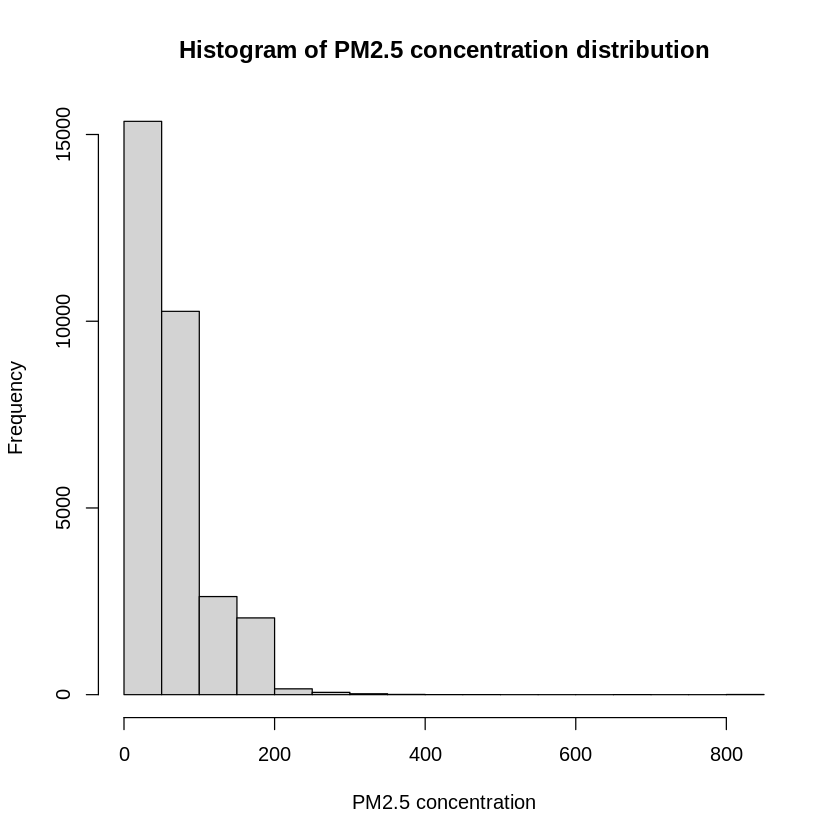

In [156]:
# Histogram of the target variable
hist(Y,
     main = "Histogram of PM2.5 concentration distribution",
     xlab = "PM2.5 concentration",
     ylab = "Frequency")



In [157]:
mean(Y)

[1] 61.14804

In [158]:
var(Y)

[1] 2195.982

In [159]:
# Compute the frequency table for the target variable
frequency_table <- table(Y)
prop_table <- prop.table(frequency_table)
percentage_table <- prop_table * 100
# Overview of the percentage table
percentage_table

Y
          1           2           3           4           5           6 
0.134175475 0.078541742 0.058906306 0.058906306 0.294531531 0.098177177 
          7           8           9         9.3         9.4         9.5 
0.176718919 0.363255555 0.985044343 0.003272573 0.003272573 0.003272573 
        9.6          10          11        11.4        11.5        11.6 
0.003272573 0.539974474 0.464705305 0.003272573 0.006545145 0.003272573 
       11.7        11.9          12        12.1        12.2        12.3 
0.003272573 0.003272573 0.503976176 0.009817718 0.003272573 0.003272573 
       12.4        12.5        12.6        12.7        12.8        12.9 
0.006545145 0.006545145 0.003272573 0.013090290 0.003272573 0.003272573 
         13        13.1        13.2        13.6        13.7        13.8 
2.496972870 0.003272573 0.009817718 0.006545145 0.019635435 0.006545145 
         14        14.1        14.2        14.3        14.5        14.7 
0.697057957 0.013090290 0.003272573 0.006545145 0

Additionally, the density plot of the target variable

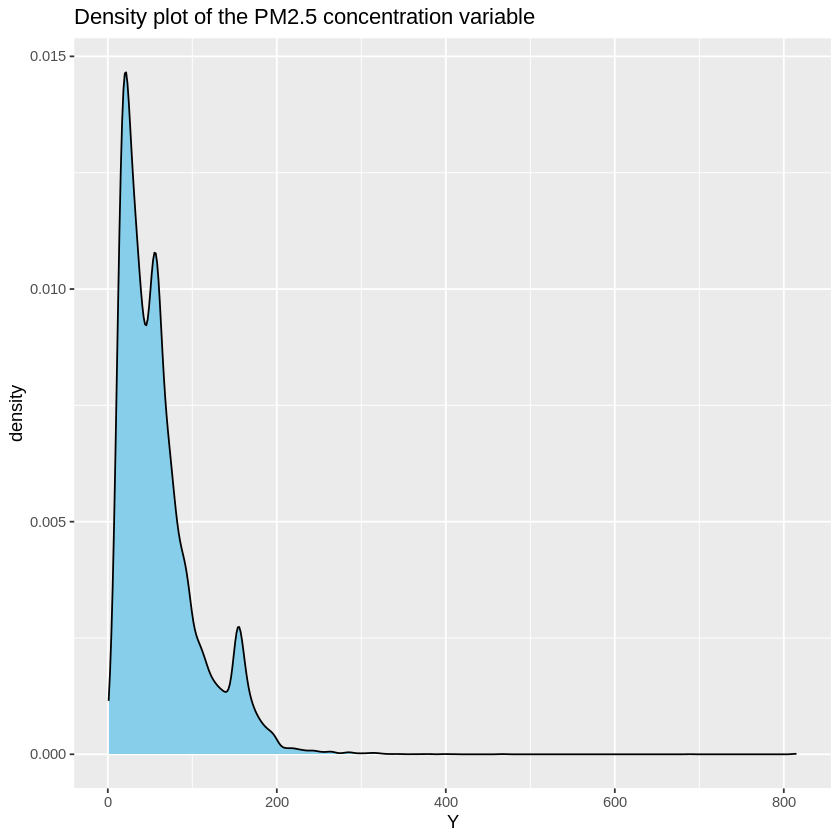

In [160]:
ggplot(training_data, aes(x = Y)) +
  geom_density(fill = "skyblue", color = "black") +
  labs(title = "Density plot of the PM2.5 concentration variable")

From these plots, we can see that the dataset is umbalanced since the distribution is left-skewed. There is a clear peak towards the value 25 for the target variable (since the percentage table indicates the highest frequency value for this value). The distribution of the target variable seems to be consistent since the higher the PM2.5 matter concentration is, the lower the frequency is (indicating that higher level of pollution are less frequent).

We also plot the boxplot to visualise potential outliers.

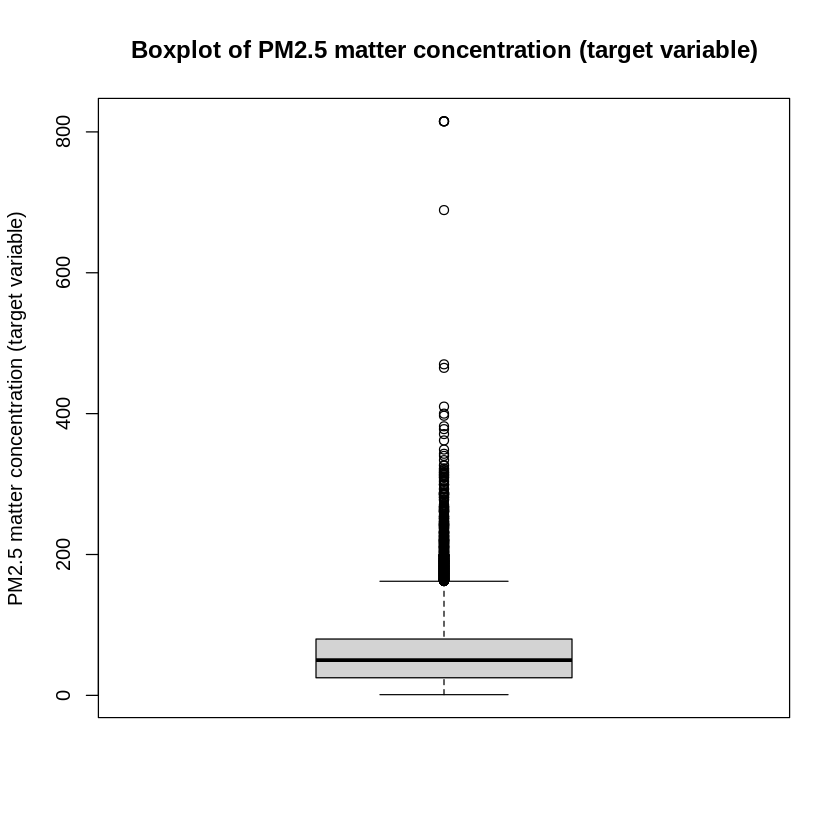

In [161]:
boxplot(Y,
        main = "Boxplot of PM2.5 matter concentration (target variable)",
        ylab = "PM2.5 matter concentration (target variable)")

This boxplot is indicating a strong positive skew and showing a lot of outliers. This is not really a good settings for training our models. We need to do some transformation to center the distribution and remove the outliers.

# Log Transformation

Applying a log transforation to the target variable which is skewed can help to reduce the skewness and therefore make the distribution more symmetric. Logarithmic transformations compress the range of extreme values and thus reduces the impact of outliers.

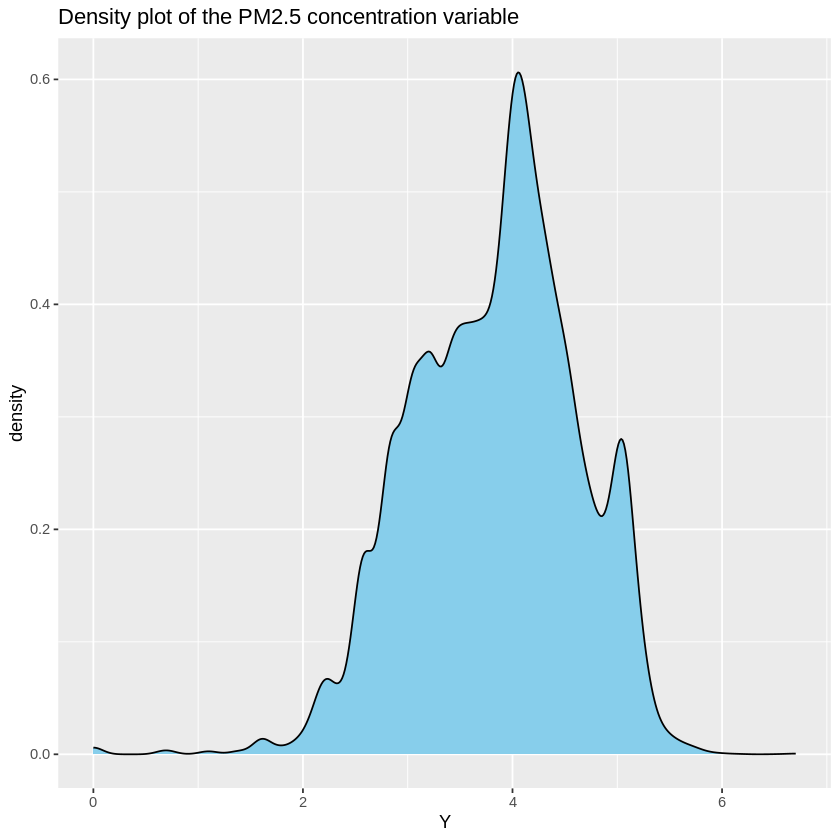

In [162]:
Y <- log(Y) # Log transformation on te training target set


ggplot(training_data, aes(x = Y)) +
  geom_density(fill = "skyblue", color = "black") +
  labs(title = "Density plot of the PM2.5 concentration variable")



In [163]:
mean(Y)
var(Y)

[1] 3.834184

[1] 0.6111715

We can see that the log transformation has effectively reduced the skewness of the distribution, leading to a more symmetric one.

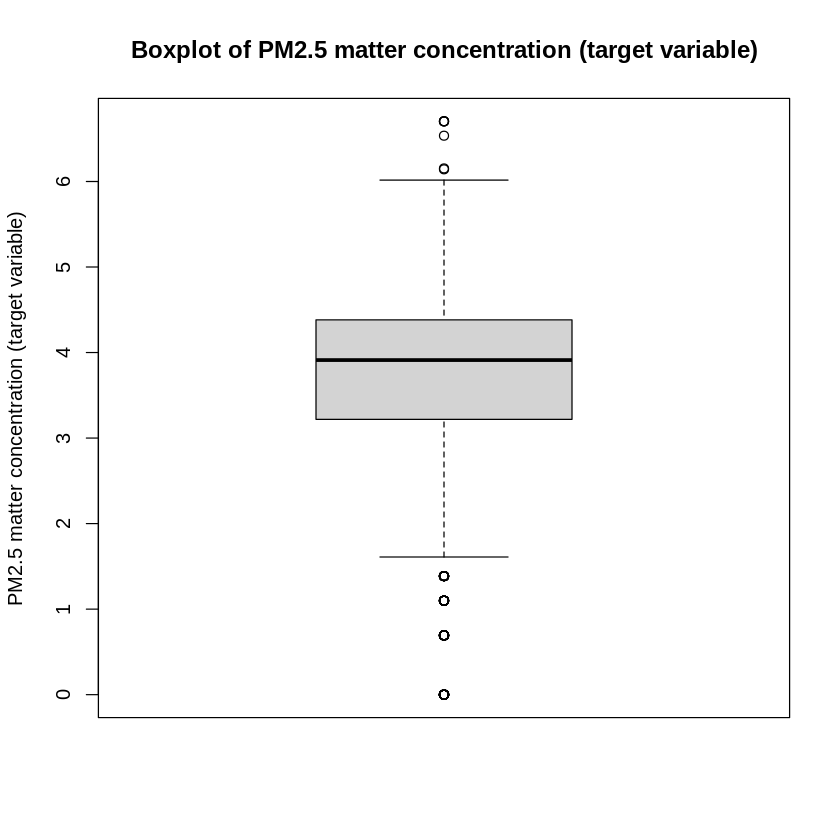

In [164]:
boxplot(Y,
        main = "Boxplot of PM2.5 matter concentration (target variable)",
        ylab = "PM2.5 matter concentration (target variable)")

The boxplot shows less outliers and a symmetric distribution (as demonstrated by the density plot). Now our data are ready to be feed into our machine learning models for the training.

# Linear model

Before doing the feature selection process, we create a linear model for predicting the PM2.5 concentration matter on the basis of the feature and compute the root mean squared error as performance metric, defined as follow :

$$ RMSE= \sqrt{ \frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} (y_{i} - \hat{y_{i}})^2}$$  

The second performance metric is the normalised mean squared error which is defined as follow :
$$ NMSE=  \frac{\sum_{i=1}^{N_{ts}} (y_{i} - \hat{y_{i}})^2}{\sum_{i=1}^{N_{ts}} (y_{i} - \bar{y})^2}$$
where
- $N_{ts}$ is the number of test observations,
- $\bar{y}$ = $\frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} y_i$
- $y_{i}$ is the measured concentration of the $i$th test observation,
- $\hat{y_{i}}$  is the predicted concentration of the $i$th  test observation.



The purpose of doing this is to have a first feeling on the potential features that significantly are correlated with the output

In [165]:
DS<-cbind(X,target=Y) # Create a new dataset containing the features and the target column
model<- lm(target~.,DS)
Y_hat<- predict(model,X)
# Inverse-transform the predictions
Y_hat <- exp(Y_hat)
rmse<-sqrt(mean((exp(Y)-Y_hat)^2))
print(paste("RMSE =",round(rmse,digits=4)))

[1] "RMSE = 46.0076"


To have a first overview of which input variables are correlated with the output

In [166]:
summary(model)


Call:
lm(formula = target ~ ., data = DS)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8236 -0.3910  0.0426  0.4144  2.9985 

Coefficients: (1 not defined because of singularities)
                                                      Estimate Std. Error
(Intercept)                                           6.135951   1.168155
precipitable_water_entire_atmosphere                 -0.400110   0.061874
relative_humidity_2m_above_ground                     0.256786   0.036729
specific_humidity_2m_above_ground                    -0.632822   0.082885
temperature_2m_above_ground                          -1.286331   0.090209
u_component_of_wind_10m_above_ground                 -0.726951   0.048137
v_component_of_wind_10m_above_ground                  0.599667   0.044107
L3_NO2_NO2_column_number_density                      2.146254   0.237443
L3_NO2_NO2_slant_column_number_density                2.554622   0.244903
L3_NO2_absorbing_aerosol_index                       -0.104317   0.

All the variables with stars (either \*,\** or \***)  impact significantly the target variable (PM2.5 concentration matter). The number of stars indicates the significance level chosen (either 0.05, 0.01 or 0.001). For example, the variable "L3_NO2_NO2_column_number_density" impacts significantly the PM2.5 concentration matter with a significance level of 0.001. With this overview, we can have a feeling about which variables are necessary for the prediction of the target variable.                   

# Relationship between features and the ouput

# Correlation

One way to analyze the relationship between the features and the output is to compute the correlation between the features and the target variable. Features having strong correlation factor with the target variable means that there is a significant relationship or association between that particular feature and the target variable.


We compute the correlation factors between the features and the target variable and order them in deacreasing order

In [167]:
correlation_vector <-abs(cor(X,Y))
# Rank variables according to correlation with the output variable
correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
selected_column_names <- colnames(X)[correlation_ranking_idx]
# Overview of the 10 most correlated feature with output variable
selected_column_names[1:10]

[1] "L3_AER_AI_sensor_altitude"                      
 [2] "L3_HCHO_tropospheric_HCHO_column_number_density"
 [3] "L3_CO_CO_column_number_density"                 
 [4] "L3_HCHO_HCHO_slant_column_number_density"       
 [5] "L3_NO2_NO2_column_number_density"               
 [6] "L3_NO2_NO2_slant_column_number_density"         
 [7] "L3_NO2_tropospheric_NO2_column_number_density"  
 [8] "L3_AER_AI_solar_azimuth_angle"                  
 [9] "L3_CLOUD_solar_azimuth_angle"                   
[10] "L3_O3_solar_azimuth_angle"

In the next, we will use this correlation factor to do feature selection, using therefore a filter method.

# Relationship between features

Features having strong correlation with each other provide redundant information which introduce unnecessary complexity. Therefore, eliminating such features can streamline model training, reduce overfitting, and enhance efficiency. To analyse the correlation between features, we use a correlaton plot that indicates the correlation factor for each pairs of features. As the number of variables is high, we cannot plot the correlation plot of all the variables. Therefore, we plot only the correlation plot of the 50 first features with the highest correlation in relation to the output variable



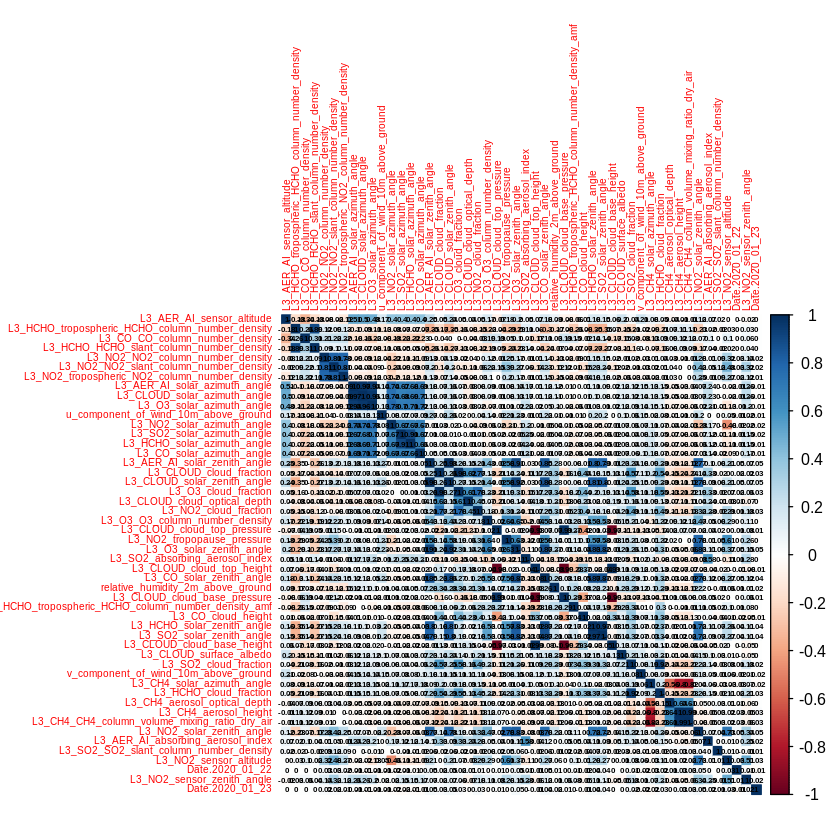

In [168]:
selected_features <- X[,correlation_ranking_idx]
plot_features <- X[,correlation_ranking_idx[1:50]]
correlations <- cor(plot_features)
corrplot(correlations, method = "color", addCoef.col = "black", number.cex = 0.4, tl.cex = 0.5,number.digits = 2)

As this plot shows, there are a lot of features that are strongly correlated. This shows the necessary of applying a feature selection technique.  To avoid overfitting and unnecessary complexity, we need to remove the features that provide no additional information. To do that, we fix a treshold of 0.9 and delete all features with correlation > 0.9 and keep only the best one. By keeping only the best one and therefore to choose the feature to delete, we look at the correlation rate of the feature with the target variable. We keep the feature having the higher correlation with respect to the target variable.



In [169]:
plot_features <- X[,correlation_ranking_idx]
correlations <- cor(plot_features)
n_features <- ncol(plot_features)

target_correlations <- cor(X, Y) # Correlation of features according to target
target_correlations <- target_correlations[correlation_ranking_idx]

# List to keep track of features to delete
to_delete <- c()


for (i in 1:(n_features-1)) {
  for (j in (i+1):n_features) {
    if (abs(correlations[i, j]) > 0.9) {
      if (abs(target_correlations[i]) < abs(target_correlations[j])) {
        to_delete <- c(to_delete, i)
      } else {
        to_delete <- c(to_delete, j)
      }
    }
  }
}

# Remove duplicates
to_delete <- unique(to_delete)
print(paste("Number of features before deleting highly correlated ", ncol(X)))
dim(X)
# Remove the highly correlated features
X <- X[, -to_delete]
testing_data <- testing_data[, -to_delete]
dim(testing_data)
N<-nrow(X)    #Number of examples
n<-ncol(X)    #Number of input variables
print(paste("Number of features after deleting highly correlated ", ncol(X)))
dim(X)



[1] "Number of features before deleting highly correlated  168"


[1] 30557   168

[1] 16136   147

[1] "Number of features after deleting highly correlated  147"


[1] 30557   147

21 features have been deleted from the dataset. All of these features were highly correlated.

# Feature selection

# 1. Correlation  with the output

The objective of this filter method is to keep the most correlated variables with the target variable. To have a better overview of the generalization to useen data of the model, we will use a cross validation with 2 folds. Usually, 10 folds are used but in our case we have 147 features and therefore for computational purpose it is not pratical to do a 10 cross validation with our laptops.

In [170]:
# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
CV_folds <- 2
size_CV <-floor(N/CV_folds)
CV_err<-matrix(0,nrow=n,ncol=CV_folds)
for (i in 1:CV_folds) {
    print(paste(i))
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]
    Y_ts<-Y[idx_ts]

    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]


    # Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    # Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix

  for (nb_features in 1:length(correlation_ranking_idx)) {


          # Create a dataset including only the nb_features most correlated variables with the output
          DS<-cbind(X_tr[,correlation_ranking_idx[1:nb_features],drop=F],target=Y_tr)

          # Model fit (using lm function)
          model<- lm(target~.,DS)

          # Model prediction
        Y_hat<- predict(model,X_ts[,correlation_ranking_idx[1:nb_features],drop=F])
        Y_hat <- exp(Y_hat) # Transform the log-prediction into the real prediction (log-transformation)
        CV_err[nb_features,i] <-sqrt(mean((exp(Y_ts)-Y_hat)^2))
  }
}
print(paste("#Features: ",c(1:n)," ; RMSE error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))


[1] "1"
[1] "2"
  [1] "#Features:  1  ; RMSE error= 46.6027  ; std dev= 3.6094"    
  [2] "#Features:  2  ; RMSE error= 44.7716  ; std dev= 3.1224"    
  [3] "#Features:  3  ; RMSE error= 75.4308  ; std dev= 42.0807"   
  [4] "#Features:  4  ; RMSE error= 73.9446  ; std dev= 39.3814"   
  [5] "#Features:  5  ; RMSE error= 73.0809  ; std dev= 38.2842"   
  [6] "#Features:  6  ; RMSE error= 73.1032  ; std dev= 38.2631"   
  [7] "#Features:  7  ; RMSE error= 87.5095  ; std dev= 58.4677"   
  [8] "#Features:  8  ; RMSE error= 138.5938  ; std dev= 130.7093" 
  [9] "#Features:  9  ; RMSE error= 133.9522  ; std dev= 124.9746" 
 [10] "#Features:  10  ; RMSE error= 134.0845  ; std dev= 125.1466"
 [11] "#Features:  11  ; RMSE error= 134.7325  ; std dev= 126.1018"
 [12] "#Features:  12  ; RMSE error= 136.9596  ; std dev= 127.7195"
 [13] "#Features:  13  ; RMSE error= 137.7577  ; std dev= 125.8583"
 [14] "#Features:  14  ; RMSE error= 115.5761  ; std dev= 91.5845" 
 [15] "#Features:  15  ; RMSE er

As we can see, by adding the correlated variables (from the most correlated to the least correlated with the target variable), we can see that the performance metric, i.e here we analyses only the RMSE, decreases with the addition of features, indicating that these variables are relevant for predicting the target. Nevertheless, adding more and more  features may increase the chance of overfitting (model having low bias and high variance).

# 2.  mRMR

The minimum-Redundancy maximum-Relevancy (mRMR) aproach is used to select features based on two criterias, how much it contributes to predicting the target variable and how little correlation it has with other variables.

We define Relevance as:

$$ D(f, y) = I(f; y) $$

where $ I(f; y) $ is the mutual information between feature $f$ and target $y$

We define Redundancy as:

$$ R(f, S) = \frac{1}{|S|} \sum_{s \in S} I(f; s) $$

where $ I(f; s) $ is the mutual information between feature $f$ and feature $s$ of the $S$ already selected features.

Finally, we define the mRMR Criterion for selecting the most fitting features to select as:

$$ \text{mRMR}(f) = D(f, y) - R(f, S) $$

In [171]:
# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
CV_folds <- 2
size_CV <-floor(N/CV_folds)
CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {

    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]
    Y_ts<-Y[idx_ts]

    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]

    # Computing the mutual_info between input variables and output variable on the training set
    mutual_info <- -0.5 * log(1 - cor(X_tr,Y_tr)^2)

    # Initialization : No variables are selected and all the variables are candidates
    selected<-c()
    candidates<-1:n

    #mRMR ranks the variables by taking account not only the mutual_info with the output, but also by avoiding redudant variables
    for (j in 1:n) {

        redundancy_score<-numeric(length(candidates))

        if (length(selected)>0) {
            # Compute the mutual_info between the selected variables and the candidates on the training set
            mutual_info_selected_candidates <- -0.5 * log(1 - cor(X_tr[,selected,drop=F],X_tr[,candidates,drop=F])^2)
            # Compute the mean mutual_info for each candidate variable, across the selected variables
            redundancy_score<-apply(mutual_info_selected_candidates,2,mean)
        }

        # mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score<-mutual_info[candidates]-redundancy_score

        # Select the candidate variable that maximises the mRMR score
        selected_current<-candidates[which.max(mRMR_score)]
        selected<-c(selected,selected_current)

        # Remove the selected variables from the candidates
        candidates<-setdiff(candidates,selected_current)
    }

    ranking <- selected

    for (nb_features in 1:length(ranking)) {

        # Create a dataset including only the first nb_features selected variables
        DS<-cbind(X_tr[,ranking[1:nb_features],drop=F],target=Y_tr)

        # Model fit (using lm function)
        model<- lm(target~.,DS)

        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        Y_hat_ts<- exp(Y_hat_ts)

        # Cross-validation error = MSE
        CV_err[nb_features,i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
    }
}

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

[1] "nb feature 1"
[1] "nb feature 2"
[1] "nb feature 3"
[1] "nb feature 4"
[1] "nb feature 5"
[1] "nb feature 6"
[1] "nb feature 7"
[1] "nb feature 8"
[1] "nb feature 9"
[1] "nb feature 10"
[1] "nb feature 11"
[1] "nb feature 12"
[1] "nb feature 13"
[1] "nb feature 14"
[1] "nb feature 15"
[1] "nb feature 16"
[1] "nb feature 17"
[1] "nb feature 18"
[1] "nb feature 19"
[1] "nb feature 20"
[1] "nb feature 21"
[1] "nb feature 22"
[1] "nb feature 23"
[1] "nb feature 24"
[1] "nb feature 25"
[1] "nb feature 26"
[1] "nb feature 27"
[1] "nb feature 28"
[1] "nb feature 29"
[1] "nb feature 30"
[1] "nb feature 31"
[1] "nb feature 32"
[1] "nb feature 33"
[1] "nb feature 34"
[1] "nb feature 35"
[1] "nb feature 36"
[1] "nb feature 37"
[1] "nb feature 38"
[1] "nb feature 39"
[1] "nb feature 40"
[1] "nb feature 41"
[1] "nb feature 42"
[1] "nb feature 43"
[1] "nb feature 44"
[1] "nb feature 45"
[1] "nb feature 46"
[1] "nb feature 47"
[1] "nb feature 48"
[1] "nb feature 49"
[1] "nb feature 50"
[1] "nb f

We can make the same observation as for the previous method of feature selection. We can see that the cross validation error decreases as the number of features considered increases. Nevertheless, we see that the lowest CV RMSE is achieved at the 10th feature. So basically, adding only the 10 more relevant

# 3. PCA

To analyze our features through another technique of feature selection, we use the Principal Component Analysis (PCA). The key idea of this dimensionality reduction technique is to transform high-dimensional data into a lower-dimensional space while preserving most of the variance in the data. By combining features into new features as linear combinations that maximize variance (principal components) we can reduce the number of features used for training.

This is done by computing the covariance matrix of the features and solving the eigenvalue for each corresponding eigenvector, such that:

$$ \mathbf{C} \mathbf{v} = \lambda \mathbf{v} $$

where $ \mathbf{C} $ is the Covariance Matrix, $ \lambda $ is the eigenvalue and $ \mathbf{v} $ is the corresponding eigenvector. We do so to find the k best eigenvectors, sorted by the largest eigenvalues.

Then we compute the principal components by projecting the dataset $ \mathbf{X} $ onto the selected eigenvectors:

$$ \mathbf{P} = \mathbf{Z} \mathbf{V}_k $$

where $ \mathbf{V}_k $ is the matrix of the top k eigenvectors and $ \mathbf{Z} $ is the standarized dataset $ \mathbf{X} $ such that:

$$ \mathbf{Z} = \frac{\mathbf{X} - \mu}{\sigma} $$

where $ \mu $ is the mean of $\mathbf{X}$ and $ \sigma $ the standard deviation.

To analyze our features through another technique of feature selection, we use the Principal Component Analysis (PCA). The key idea of this dimensionality reduction technique is to transform high-dimensional data into a lower-dimensional space while preserving most of the variance in the data.  

In [172]:
# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
CV_folds <- 2
size_CV <-floor(N/CV_folds)
CV_err<-matrix(0,nrow=n,ncol=CV_folds)

# Compute PCA on the full input dataset X and return the dataset transformed in the space of principal components
X_pca<-data.frame(prcomp(X,retx=T)$x)

for (i in 1:CV_folds) {

    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_pca[idx_ts,]
    Y_ts<-Y[idx_ts]

    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_pca[idx_tr,]
    Y_tr<-Y[idx_tr]

    for (nb_components in 1:n) {

        # Create a dataset including only the first nb_components principal components
        DS<-cbind(X_tr[,1:nb_components,drop=F],target=Y_tr)

        # Model fit (using lm function)
        model<- lm(target~.,DS)

        # Model predictm
        Y_hat_ts<- predict(model,X_ts[,1:nb_components,drop=F])
        Y_hat_ts<- exp(Y_hat_ts)
        CV_err[nb_components,i]<-sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
    }
}

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))


  [1] "#Features:  1  ; CV error= 49.093  ; std dev= 4.3211"    
  [2] "#Features:  2  ; CV error= 49.072  ; std dev= 4.3236"    
  [3] "#Features:  3  ; CV error= 48.8358  ; std dev= 4.0111"   
  [4] "#Features:  4  ; CV error= 48.6802  ; std dev= 3.9974"   
  [5] "#Features:  5  ; CV error= 47.6381  ; std dev= 3.6656"   
  [6] "#Features:  6  ; CV error= 47.4995  ; std dev= 3.6212"   
  [7] "#Features:  7  ; CV error= 47.4226  ; std dev= 3.5971"   
  [8] "#Features:  8  ; CV error= 47.416  ; std dev= 3.5901"    
  [9] "#Features:  9  ; CV error= 47.3488  ; std dev= 3.5538"   
 [10] "#Features:  10  ; CV error= 47.3555  ; std dev= 3.5444"  
 [11] "#Features:  11  ; CV error= 47.36  ; std dev= 3.5478"    
 [12] "#Features:  12  ; CV error= 47.2746  ; std dev= 3.478"   
 [13] "#Features:  13  ; CV error= 47.2675  ; std dev= 3.4799"  
 [14] "#Features:  14  ; CV error= 46.6563  ; std dev= 3.198"   
 [15] "#Features:  15  ; CV error= 46.6563  ; std dev= 3.1553"  
 [16] "#Features:  16  ; 

We can see that the CV error decreases initially as the number of features increases, reaching a minimum CV error at around 121 features. After, the error starts to increase significantly and thus adding more features introduces noise and irrelevant information. It indicates that up to 121 features, the model is able to effectively capture the relevant variance in the data without overfitting.

# Final features selection


After applying these 3 features selection methods, we based our choice on the result of the correlation algorithm and decided to keep only the 20 most correlated features. The rationale behind this choice is to have a good trade off between having enough features providing information and computational efficiency for trainig the models. From the 20th most correlated feature, we obtain a good result in terms of cross validation error and standard deviation. We know that adding more features may certainly lead to better performance of our algorithm but for pratical reasons (computational purpose) we need to restrict our feature set significantly (our laptop does not allow us to take more features). Note that we use 10-fold cross validation to assess the performance of our futur models which is computationally expensive.

In [173]:
selected_features <- correlation_ranking_idx[1:20]
selected_features_names <- colnames(X)[selected_features]
selected_features_names

[1] "L3_AER_AI_sensor_altitude"             
 [2] "L3_CO_CO_column_number_density"        
 [3] "L3_NO2_NO2_slant_column_number_density"
 [4] "L3_NO2_NO2_column_number_density"      
 [5] "L3_AER_AI_solar_azimuth_angle"         
 [6] "L3_CLOUD_solar_azimuth_angle"          
 [7] "L3_O3_solar_azimuth_angle"             
 [8] "L3_SO2_solar_azimuth_angle"            
 [9] "u_component_of_wind_10m_above_ground"  
[10] "L3_HCHO_solar_azimuth_angle"           
[11] "L3_CO_solar_azimuth_angle"             
[12] "L3_CLOUD_cloud_top_pressure"           
[13] "L3_SO2_absorbing_aerosol_index"        
[14] "L3_CLOUD_cloud_top_height"             
[15] "L3_CLOUD_cloud_optical_depth"          
[16] "L3_CLOUD_cloud_fraction"               
[17] "L3_CO_cloud_height"                    
[18] "L3_O3_cloud_fraction"                  
[19] "L3_CLOUD_cloud_base_height"            
[20] "L3_NO2_tropopause_pressure"

In [174]:
X_features_selected <- X[,selected_features]
dim(X_features_selected)
X_test<-testing_data[,selected_features]
dim(X_test)



[1] 30557    20

[1] 16136    20

We therefore keep only the 20 most correlated features with the target variable.

# Model training

For this part, we selected 6 models to implement : linear models, Elastic net with ridge and lasso, decision tree, ensemble of decision trees, random forest, and boosted-gradient trees . As validation method, we will systematically use a 10-fold cross validation error to have a better view of the generalization of the models to useen data. As we use a 10-fold validation, we do not need to split the dataset into two categories : a training set and a validation set. This is not necessary since the cross validation already split the dataset into multiple subsets and then use some of these subsets for training the model and the rest for testing its performance.

The two performance metrics used to assess the performance of the models are the following :

- The root mean squared error

$$ RMSE= \sqrt{ \frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} (y_{i} - \hat{y_{i}})^2}$$  

- The normalised mean squared error
$$ NMSE=  \frac{\sum_{i=1}^{N_{ts}} (y_{i} - \hat{y_{i}})^2}{\sum_{i=1}^{N_{ts}} (y_{i} - \bar{y})^2}$$
where
- $N_{ts}$ is the number of test observations,
- $\bar{y}$ = $\frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} y_i$
- $y_{i}$ is the measured concentration of the $i$th test observation,
- $\hat{y_{i}}$  is the predicted concentration of the $i$th  test observation.


Note that as input variable, we use the selected features computed previously using feature selection done. The number of features is much lower (from 455 to 17) and thus we can make a 10-folds cross validation since it is computationally feasible.

# 1. Multiple linear regression model

The first model that we implement is a multiple linear regression model. This model is easy to interpret and simple which makes a good starting point for modeling tasks. It is also computational efficiency. Nevertheless, this model is limited as it makes the strong assumption that the relationship between the features and the target variable is linear. One other advantage of this model is that it does not require hyper-parameter tuning.


The general form for this model is :

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon $$

where:

- $y $ is the dependant variable.
- $x_1, x_2, ..., x_p $ are the independent variables
- $\beta_0 $ is the intercept term
- $\beta_1, \beta_2, ..., \beta_p $ are the coefficients of the independent variables
 $\epsilon $ is the error term





In [175]:
CV_folds<- 10
size_CV <-floor(N/CV_folds)
CV_rmse_lm<-numeric(CV_folds)
CV_nmse_lm<-numeric(CV_folds)
average_residuals_lm <- numeric(CV_folds)

for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]
     DS<-cbind(X_tr,target=Y_tr)
     # Model fit (using lm function)
     model_lm<- lm(target~.,DS)

     # Model prediction
     Y_hat_ts<- predict(model_lm,X_ts)
     Y_hat_ts<- exp(Y_hat_ts)

     # Residual calculation
     residuals <- exp(Y_ts) - Y_hat_ts
     average_residuals_lm <- average_residuals_lm + residuals

     # Cross validation error = Root Mean Squared Error
     CV_rmse_lm[i]<-sqrt(mean(residuals^2))
     CV_nmse_lm[i]<- sum(residuals^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)

}
average_residuals_lm <- average_residuals_lm / CV_folds


print(paste("CV root mean squared error=",round(mean(CV_rmse_lm),digits=4), " ; std dev=",round(sd(CV_rmse_lm),digits=4)))
print(paste("CV normalised mean squared error =",round(mean(CV_nmse_lm),digits=4), " ; std dev=",round(sd(CV_nmse_lm),digits=4)))


Warning message in average_residuals_lm + residuals:
“longer object length is not a multiple of shorter object length”


[1] "CV root mean squared error= 70.4034  ; std dev= 67.1226"
[1] "CV normalised mean squared error = 3.3651  ; std dev= 6.379"


This model provides a good starting point for looking how well it performs on the training data (using a cross validaton method). Nevertheless, we can see that the cross validation root mean squared error (RMSE) and the standard deviation  are relatively high. It seems that the relationship between the features and the target are not linear. Equivalently for the cross validation normalised mean squared error (NMSE).

# 2. Elastic Net (LASSO/RIDGE)

Elastic Net regularization is a hybrid regularization technique that combines the penalties of LASSO (L1) and RIDGE (L2) regularization.
Both LASSO and Ridge regularization are effective techniques for preventing overfitting and improving the robustness of linear regression models. Each one with its own advantages and use cases.


In this section, we implement the three regularization techniques : Elastic net, Lasso and Ridge.
To do that, we use the package glmnet and change the value of the parameter alpha. This parameter controls the elastic net mixing parameter, which balances the penalties of Lasso (L1) and Ridge (L2) regularization. In our cases we consider differents values of alpha. In an extreme, setting alpha = 1 corresponds to pure Lasso regularization, where only the L1 penalty is applied. In the other extreme, setting alpha = 0 corresponds to pure Ridge regularization, where only the L2 penalty is applied. In the middle, intermediate values of alpha (0 < alpha < 1) correspond to elastic net regularization, which combines both L1 and L2 penalties.

# LASSO


LASSO performs automatic variable selection by setting some coefficients to zero, while Ridge does not perform variable selection.

In [176]:
size_CV <- floor(N / CV_folds)

CV_rmse_lasso <- numeric(CV_folds)
CV_nmse_lasso <- numeric(CV_folds)
average_residuals_lasso <- numeric(N)

for (i in 1:CV_folds) {

    idx_ts <- (((i - 1) * size_CV + 1):(i * size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts <- X_features_selected[idx_ts, ]
    Y_ts <- Y[idx_ts]

    idx_tr <- setdiff(1:N, idx_ts) ### idx_tr represents indices of the training set for the i-th fold
    X_tr <- X_features_selected[idx_tr, ]
    Y_tr <- Y[idx_tr]

    # Ensure X_ts and X_tr are matrices
    X_ts <- as.matrix(X_ts)
    X_tr <- as.matrix(X_tr)

    # Model fit (using glmnet function)
    lasso_model <- glmnet(X_tr, Y_tr, alpha = 1)

    # Model prediction
    Y_hat_ts <- predict(lasso_model, newx = X_ts)
    Y_hat_ts <- exp(Y_hat_ts)

    # Residual calculation
    residuals <- exp(Y_ts) - Y_hat_ts
    average_residuals_lasso[idx_ts] <- average_residuals_lasso[idx_ts] + residuals

    # Cross validation error = Root Mean Squared Error
    CV_rmse_lasso[i] <- sqrt(mean((exp(Y_ts) - Y_hat_ts)^2))
    CV_nmse_lasso[i] <- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
  }


average_residuals_lasso <- average_residuals_lasso / CV_folds

print(paste("CV RMSE=", round(mean(CV_rmse_lasso), digits = 4), " ; std dev=", round(sd(CV_rmse_lasso), digits = 4)))
print(paste("CV NMSE=", round(mean(CV_nmse_lasso), digits = 4), " ; std dev=", round(sd(CV_nmse_lasso), digits = 4)))


Warning message in average_residuals_lasso[idx_ts] <- average_residuals_lasso[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_lasso[idx_ts] <- average_residuals_lasso[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_lasso[idx_ts] <- average_residuals_lasso[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_lasso[idx_ts] <- average_residuals_lasso[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_lasso[idx_ts] <- average_residuals_lasso[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_lasso[idx_ts] <- average_residuals_lasso[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_lasso[idx

[1] "CV RMSE= 62.3416  ; std dev= 50.6582"
[1] "CV NMSE= 213.6151  ; std dev= 356.7325"


We can see that this model performed worser than the multiple linear regression model in terms of mean CV RMSE and NMSE. This can be explained by the fact that all the features were useful. LASSO regularization assumes that the true underlying model is sparse, meaning that only a subset of features are relevant for prediction. It seems that doing shrinkage variable improves the performance of the linear model.

# RIDGE



Ridge regularization shrinks all coefficients continuously towards zero, whereas LASSO can set some coefficients exactly to zero

In [177]:
size_CV <- floor(N / CV_folds)

CV_rmse_ridge <- numeric(CV_folds)
CV_nmse_ridge <- numeric(CV_folds)
average_residuals_ridge <- numeric(N)

for (i in 1:CV_folds) {

    idx_ts <- (((i - 1) * size_CV + 1):(i * size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts <- X_features_selected[idx_ts, ]
    Y_ts <- Y[idx_ts]

    idx_tr <- setdiff(1:N, idx_ts) ### idx_tr represents indices of the training set for the i-th fold
    X_tr <- X_features_selected[idx_tr, ]
    Y_tr <- Y[idx_tr]

    # Ensure X_ts and X_tr are matrices
    X_ts <- as.matrix(X_ts)
    X_tr <- as.matrix(X_tr)

    # Model fit (using glmnet function)
    ridge_model <- glmnet(X_tr, Y_tr, alpha = 0)

    # Model prediction
    Y_hat_ts <- predict(ridge_model, newx = X_ts)
    Y_hat_ts <- exp(Y_hat_ts)

    # Residual calculation
    residuals <- exp(Y_ts) - Y_hat_ts
    average_residuals_ridge[idx_ts] <- average_residuals_ridge[idx_ts] + residuals

    # Cross validation error = Root Mean Squared Error
    CV_rmse_ridge[i] <- sqrt(mean((exp(Y_ts) - Y_hat_ts)^2))
    CV_nmse_ridge[i] <- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
  }


average_residuals_ridge <- average_residuals_ridge / CV_folds

print(paste("CV RMSE=", round(mean(CV_rmse_ridge), digits = 4), " ; std dev=", round(sd(CV_rmse_ridge), digits = 4)))
print(paste("CV NMSE=", round(mean(CV_nmse_ridge), digits = 4), " ; std dev=", round(sd(CV_nmse_ridge), digits = 4)))


Warning message in average_residuals_ridge[idx_ts] <- average_residuals_ridge[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_ridge[idx_ts] <- average_residuals_ridge[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_ridge[idx_ts] <- average_residuals_ridge[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_ridge[idx_ts] <- average_residuals_ridge[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_ridge[idx_ts] <- average_residuals_ridge[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_ridge[idx_ts] <- average_residuals_ridge[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_ridge[idx

[1] "CV RMSE= 51.4848  ; std dev= 19.062"
[1] "CV NMSE= 127.765  ; std dev= 77.5021"


We can see that the RIDGE model performed better than LASSO in terms of both mean cv RMSE and NMSE. This can be explained by the fact that ridge does not put the features exactly to zero but towards zero. Ridge regression handles correlated features more effectively than lasso regression. It does not enforce sparsity and thus can provide more robust and reliable predictions by including all features in the model.

# Elastic net

Elastic net combines the penalties of both Ridge Regression and Lasso Regression in an attempt to beneficiate from the advantages of both methods while overcoming their individual limitations.



In [178]:
size_CV <- floor(N / CV_folds)

CV_rmse_elastic <- numeric(CV_folds)
CV_nmse_elastic <- numeric(CV_folds)
average_residuals_elastic <- numeric(N)

for (i in 1:CV_folds) {

    idx_ts <- (((i - 1) * size_CV + 1):(i * size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts <- X_features_selected[idx_ts, ]
    Y_ts <- Y[idx_ts]

    idx_tr <- setdiff(1:N, idx_ts) ### idx_tr represents indices of the training set for the i-th fold
    X_tr <- X_features_selected[idx_tr, ]
    Y_tr <- Y[idx_tr]

    # Ensure X_ts and X_tr are matrices
    X_ts <- as.matrix(X_ts)
    X_tr <- as.matrix(X_tr)

    # Model fit (using glmnet function)
    elastic_model <- glmnet(X_tr, Y_tr, alpha = 0.5)

    # Model prediction
    Y_hat_ts <- predict(elastic_model, newx = X_ts)
    Y_hat_ts <- exp(Y_hat_ts)

    # Residual calculation
    residuals <- exp(Y_ts) - Y_hat_ts
    average_residuals_elastic[idx_ts] <- average_residuals_elastic[idx_ts] + residuals

    # Cross validation error = Root Mean Squared Error
    CV_rmse_elastic[i] <- sqrt(mean((exp(Y_ts) - Y_hat_ts)^2))
    CV_nmse_elastic[i] <- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
  }


average_residuals_elastic <- average_residuals_elastic / CV_folds

print(paste("CV RMSE=", round(mean(CV_rmse_elastic), digits = 4), " ; std dev=", round(sd(CV_rmse_elastic), digits = 4)))
print(paste("CV NMSE=", round(mean(CV_nmse_elastic), digits = 4), " ; std dev=", round(sd(CV_nmse_elastic), digits = 4)))


Warning message in average_residuals_elastic[idx_ts] <- average_residuals_elastic[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_elastic[idx_ts] <- average_residuals_elastic[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_elastic[idx_ts] <- average_residuals_elastic[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_elastic[idx_ts] <- average_residuals_elastic[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_elastic[idx_ts] <- average_residuals_elastic[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in average_residuals_elastic[idx_ts] <- average_residuals_elastic[idx_ts] + :
“number of items to replace is not a multiple of replacement length”
Warning message in ave

[1] "CV RMSE= 62.7395  ; std dev= 51.4254"
[1] "CV NMSE= 235.6867  ; std dev= 403.6434"


For alpha = 0.5, the model performed slightly better than lasso but worser than ridge.

# 3. Decision tree

The decision tree regression model, unlike the previous model shown, is non-linear and will allow us to provide a much more complex model for prediction of target variables. First of all, it must be known that the decision tree model is possible only for single continuous target variables. The training phase involves computing a decision tree that routes a path from the root to the estimated target variable stored in a leaf. Every node of the tree is a decision-making unit that determines which node to visit next based on the values of the input features. The complexity of the tree is increased by a growing phase to sub-categorize the input data while a pruning phase reduces overfitting by merging existing variable groups with a near identical estimate.

In [179]:
size_CV <-floor(N/CV_folds)
CV_rmse_single <-numeric(CV_folds)
CV_nmse_single <-numeric(CV_folds)
average_residuals_single <- numeric(CV_folds)
for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

     DS<-cbind(X_tr,target=Y_tr)

     # Model fit (using rpart function)
     model_tree<- rpart(target~.,DS)

     # Model prediction
     Y_hat_ts<- predict(model_tree,X_ts)
     Y_hat_ts<- exp(Y_hat_ts)
     # Residual calculation
     residuals <- exp(Y_ts) - Y_hat_ts
     average_residuals_single <- average_residuals_single + residuals
     # Cross validation error = Mean Squared Error
     CV_rmse_single[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     CV_nmse_single[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)

}
average_residuals_single <- average_residuals_single / CV_folds # Residuals averaged across the folds


print(paste("CV rmse = ",round(mean(CV_rmse_single),digits=4), " ; std dev=",round(sd(CV_rmse_single),digits=4)))
print(paste("CV nmse = ",round(mean(CV_nmse_single),digits=4), " ; std dev=",round(sd(CV_nmse_single),digits=4)))

Warning message in average_residuals_single + residuals:
“longer object length is not a multiple of shorter object length”


[1] "CV rmse =  42.6714  ; std dev= 5.8373"
[1] "CV nmse =  0.8627  ; std dev= 0.0994"


The RMSE of the 10-fold cross-validation is lower than that obtained by the linear model. As a result, the decision tree performs better than the linear model. This can be explained by the fact that this model is capable of capturing complex non-linear relationships between features and the target variable. Additionally, decision trees naturally provide feature importance measures, which can be useful for feature selection. This is done by recursive binary splitting.  At each node of the tree, the algorithm evaluates every feature to find the one that best splits the data into two groups. To get more information concernig the tree constructed :

In [180]:
printcp(model_tree)


Regression tree:
rpart(formula = target ~ ., data = DS)

Variables actually used in tree construction:
[1] L3_AER_AI_sensor_altitude             
[2] L3_CO_CO_column_number_density        
[3] L3_NO2_NO2_slant_column_number_density
[4] u_component_of_wind_10m_above_ground  

Root node error: 17035/27502 = 0.61943

n= 27502 

        CP nsplit rel error  xerror      xstd
1 0.113611      0   1.00000 1.00007 0.0093411
2 0.062614      1   0.88639 0.89274 0.0087463
3 0.025517      2   0.82378 0.82680 0.0081664
4 0.018060      3   0.79826 0.80258 0.0080355
5 0.017289      4   0.78020 0.79093 0.0080015
6 0.017228      5   0.76291 0.77471 0.0079076
7 0.010738      6   0.74568 0.75294 0.0078128
8 0.010000      7   0.73494 0.74165 0.0078001


The tree was constructed using the variables listed above. This seems to be consistent since these two features are the most correlated to the target variable. Additionally, the root node error is 0.61943 which is the error at the initial node (root) of the tree, before doing any splits. The last table gives information about : the complexity parameter (CP) which which control the size of the tree, the number of split made before reaching the corresponding complexity parameter (nsplit), the relative error, the cross-validation error and its standard deviation.

To visualise all of these informations, we plot the decision tree. Note that the predicted values are provided in logarithmic scale. To obtain values in the original scale, it's necessary to exponentiate them.

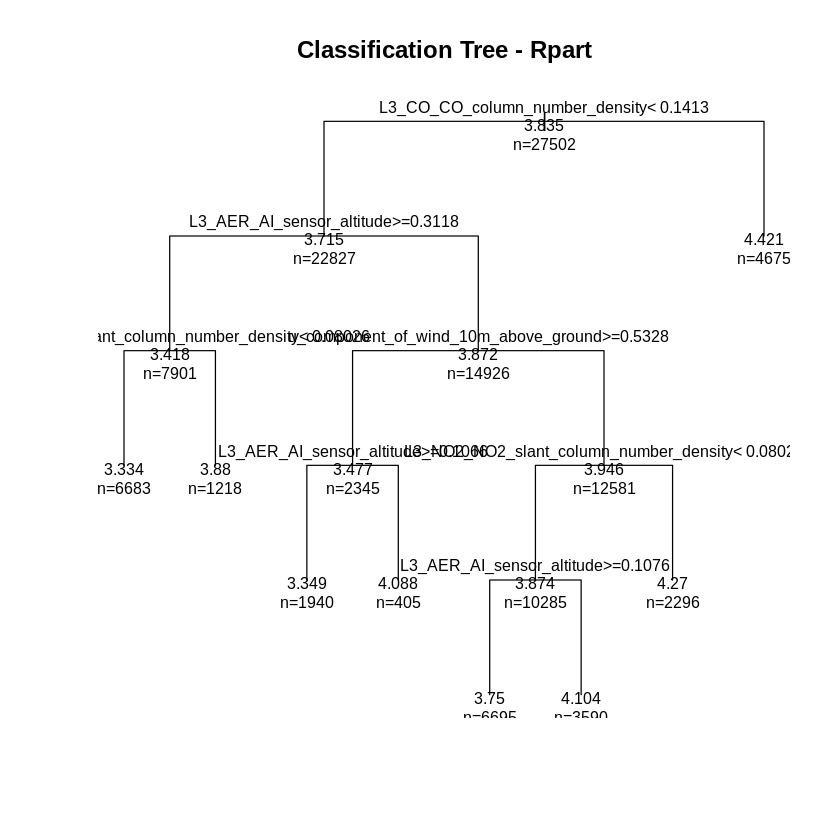

In [181]:
plot(model_tree, uniform=TRUE,
   main="Classification Tree - Rpart")
text(model_tree, use.n=TRUE, all=TRUE, cex=.8)

# 4. Ensemble of trees

An ensemble of trees refers to a collection of multiple decision trees that are combined to make predictions. We create an ensemble of models composed of $R$ = 10 decisions trees. There are several advantages of doing that. The main one is that combining the predictions of multiple trees tend to reduce the variance of the model. Let see if ensemble of trees are more accurate than a single decision tree.

In [183]:
R<-10
size_CV <-floor(N/CV_folds)
CV_rmse_ensemble<-numeric(CV_folds)
CV_nmse_ensemble<-numeric(CV_folds)
average_residuals_ensemble<- numeric(CV_folds)

for (i in 1:CV_folds) {

     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

    # The predictions of each individual model is stored as
    # a column of the Y_hat_ts_ensemble matrix
     Y_hat_ts_ensemble <- matrix(0,nrow=nrow(X_ts),ncol=R)

     for (r in 1:R) {
         idx_tr_resample <- sample(idx_tr,rep=T)
         X_tr<-X_features_selected[idx_tr_resample,]
         Y_tr<-Y[idx_tr_resample]

         DS<-cbind(X_tr,target=Y_tr)

         # Model fit (using rpart function)
         model<- rpart(target~.,DS)

         # Storing prediction for the r^th model
         Y_hat_ts_ensemble[,r]<- exp(predict(model,X_ts))


     }

     #Computing ensemble prediction (via model averaging)
     Y_hat_ts<-apply(Y_hat_ts_ensemble,1,mean)

     # Residual calculation
     residuals <- exp(Y_ts) - Y_hat_ts

     average_residuals_ensemble <- average_residuals_ensemble + residuals
     # Computation of CV RMSE
     CV_rmse_ensemble[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     # Computation of CV NRMSE
     CV_nmse_ensemble[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
     }

print(paste("CV rmse=",round(mean(CV_rmse_ensemble),digits=4), " ; std dev=",round(sd(CV_rmse_ensemble),digits=4)))
print(paste("CV nmse=",round(mean(CV_nmse_ensemble),digits=4), " ; std dev=",round(sd(CV_nmse_ensemble),digits=4)))

average_residuals_ensemble <- average_residuals_ensemble / CV_folds

Warning message in average_residuals_ensemble + residuals:
“longer object length is not a multiple of shorter object length”


[1] "CV rmse= 42.3436  ; std dev= 6.0504"
[1] "CV nmse= 0.8488  ; std dev= 0.1026"


The CV rmse error is lower with 10 decisions trees than with a single tree-based model.

In [184]:
mean(CV_rmse_ensemble) < mean(CV_rmse_single)

[1] TRUE

This shows that ensemble of learners can be more accurate than a single one learner. Nevertheless, the drawback is the computational cost of this model. Additionnally, we tune the hyperparameter $R$ which is the number of trees considered in the model. We select only to tune the hyperparamter $R$ for computational purpose and because this parameter is the one of the most impactful hyperparameters in this algorithm. We consider the following value for $R$ : 1, 2, 5 and 10.

In [185]:
# Define values of R to test
Rs <- c(1,2,5,10)

# Initialize vectors to store results
CV_rmse_mean <- numeric(length(Rs))
CV_rmse_sd <- numeric(length(Rs))

# Loop over each value of R
for (r_value in Rs) {

    # Initialize variables
    CV_rmse_ensemble <- numeric(CV_folds)
    CV_nmse_ensemble <- numeric(CV_folds)
    average_residuals_ensemble <- numeric(CV_folds)

    # Loop over each fold of cross-validation
    for (i in 1:CV_folds) {
        # Split data into training and test sets
        idx_ts <- (((i - 1) * size_CV + 1):(i * size_CV))
        X_ts <- X_features_selected[idx_ts,]
        Y_ts <- Y[idx_ts]

        idx_tr <- setdiff(1:N, idx_ts)
        X_tr <- X_features_selected[idx_tr,]
        Y_tr <- Y[idx_tr]

        # Initialize matrix to store predictions from each tree
        Y_hat_ts_ensemble <- matrix(0, nrow = nrow(X_ts), ncol = r_value)

        # Fit R decision trees
        for (r in 1:r_value) {
            idx_tr_resample <- sample(idx_tr, rep = TRUE)
            X_tr_resample <- X_features_selected[idx_tr_resample,]
            Y_tr_resample <- Y[idx_tr_resample]

            DS <- cbind(X_tr_resample, target = Y_tr_resample)

            # Fit decision tree model
            model <- rpart(target ~ ., data = DS)

            # Store predictions for the r-th model
            Y_hat_ts_ensemble[, r] <- exp(predict(model, newdata = X_ts))
        }

        # Compute ensemble prediction (via model averaging)
        Y_hat_ts <- apply(Y_hat_ts_ensemble, 1, mean)

        # Compute residuals
        residuals <- exp(Y_ts) - Y_hat_ts
        average_residuals_ensemble <- average_residuals_ensemble + residuals

        # Compute CV RMSE
        CV_rmse_ensemble[i] <- sqrt(mean((exp(Y_ts) - Y_hat_ts)^2))

        # Compute CV NRMSE
        CV_nmse_ensemble[i] <- sum((exp(Y_ts) - Y_hat_ts)^2) / sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
    }

    # Compute mean and standard deviation of RMSE
    CV_rmse_mean[r_value == Rs] <- mean(CV_rmse_ensemble)
    CV_rmse_sd[r_value == Rs] <- sd(CV_rmse_ensemble)
}


Warning message in average_residuals_ensemble + residuals:
“longer object length is not a multiple of shorter object length”
Warning message in average_residuals_ensemble + residuals:
“longer object length is not a multiple of shorter object length”
Warning message in average_residuals_ensemble + residuals:
“longer object length is not a multiple of shorter object length”
Warning message in average_residuals_ensemble + residuals:
“longer object length is not a multiple of shorter object length”


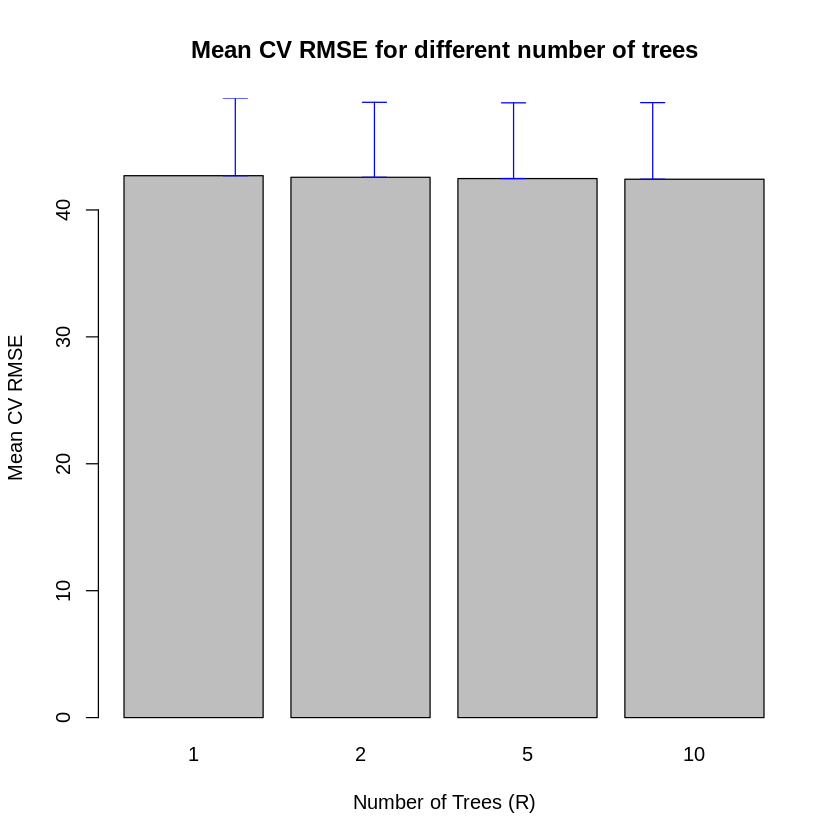

In [186]:
# Bar plot for RMSE
barplot(CV_rmse_mean, names.arg = Rs, beside = TRUE, col = "grey", ylim = c(0, max(CV_rmse_mean + CV_rmse_sd)),
        main = "Mean CV RMSE for different number of trees", xlab = "Number of Trees (R)", ylab = "Mean CV RMSE")
arrows(1:length(Rs), CV_rmse_mean, 1:length(Rs), CV_rmse_mean + CV_rmse_sd, angle = 90, code = 3, length = 0.1, col = "blue")


In this case, we can see that as the number of trees increases, the mean CV RMSE does not really decreases. Therefore, the best choice of the value of $R$ is 1 as this hyperparameter makes the model less computationally expensive but just as precise as the others. We use this model for the rest of this work.

# 5. Random Forest

Random Forest is a specific type of ensemble method that uses bagging with an additional layer of randomness. Random forest introduces randomness in the feature selection process : when splitting a node during the construction of each tree, only a random subset of features is considered for the best split. The final prediction is made by averaging the predictions.

In [187]:
CV_folds <- 10
R<-10
size_CV <-floor(N/CV_folds)
CV_rmse_rf<-numeric(CV_folds)
CV_nmse_rf<-numeric(CV_folds)
average_residuals_rf<- numeric(CV_folds)

for (i in 1:CV_folds) {

      idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
      X_ts<-X_features_selected[idx_ts,]
      Y_ts<-Y[idx_ts]

      idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
      X_tr<-X_features_selected[idx_tr,]
      Y_tr<-Y[idx_tr]

      DS<-cbind(X_tr,target=Y_tr)

      # Model fit (using randomForest function)
      model_rf <- randomForest(target~., DS, ntree=R)

      # Model prediction
      Y_hat_ts<- predict(model_rf,X_ts)
      Y_hat_ts<- exp(Y_hat_ts)
      # Residual calculation
      residuals <- exp(Y_ts) - Y_hat_ts
      average_residuals_single <- average_residuals_single + residuals

      # Cross validation error = Mean Squared Error
     CV_rmse_rf[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     # Computation of CV NMSE
     CV_nmse_rf[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
  }
average_residuals_rf <- average_residuals_rf / CV_folds

print(paste("CV rmse=",round(mean(CV_rmse_rf),digits=4), " ; std dev=",round(sd(CV_rmse_rf),digits=4)))
print(paste("CV nmse=",round(mean(CV_nmse_rf),digits=4), " ; std dev=",round(sd(CV_nmse_rf),digits=4)))



[1] "CV rmse= 37.9716  ; std dev= 5.4351"
[1] "CV nmse= 0.6824  ; std dev= 0.0836"


We can see that the CV RMSE is lower than for the ensemble of trees. This shows the power of Random Forest.  We can show the importance of the features for the random forest mode with the following plot. It is particularly  useful for understanding which features are most influential in making predictions with the model.

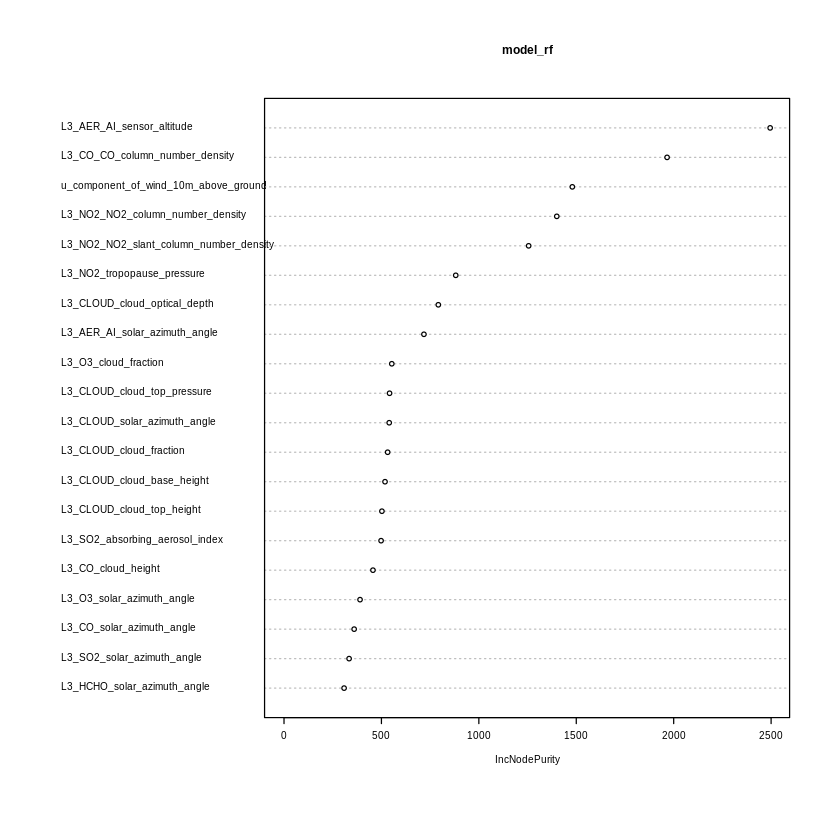

In [188]:
varImpPlot(model_rf, cex = 0.5)

The plot shows the relative importance of each input variable in the model. The higher the value of the variable importance, the more important that variable is in predicting the target variable. It therefore illustrates the feature selection done by RF.

We also tune the hyperparameter $R$ which corresponds to the number of trees in the forest. We compare the performance of the model for the following values of $R$ : 1,2,5,10.

In [189]:
CV_folds <- 10
Rs <- c(1,2,5,10)
size_CV <-floor(N/CV_folds)
CV_rmse_mean <- numeric(length(Rs))
CV_rmse_sd <- numeric(length(Rs))


for (r_value in Rs) {
  CV_rmse_rf <- numeric(CV_folds)
  CV_nmse_rf <- numeric(CV_folds)

  for (i in 1:CV_folds) {
      idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
      X_ts<-X_features_selected[idx_ts,]
      Y_ts<-Y[idx_ts]

      idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
      X_tr<-X_features_selected[idx_tr,]
      Y_tr<-Y[idx_tr]

      DS<-cbind(X_tr,target=Y_tr)

      # Model fit (using randomForest function)
      model_rf <- randomForest(target~., DS, ntree=r_value)

      # Model prediction
      Y_hat_ts<- predict(model_rf,X_ts)
      Y_hat_ts<- exp(Y_hat_ts)
      # Residual calculation
      residuals <- exp(Y_ts) - Y_hat_ts
      average_residuals_single <- average_residuals_single + residuals

       # Compute CV RMSE
      CV_rmse_rf[i] <- sqrt(mean((exp(Y_ts) - Y_hat_ts)^2))

      # Compute CV NMSE
      CV_nmse_rf[i] <- sum((exp(Y_ts) - Y_hat_ts)^2) / sum((exp(Y_ts) - mean(exp(Y_ts)))^2)

  }

  CV_rmse_mean[r_value == Rs] <- mean(CV_rmse_rf)
  CV_rmse_sd[r_value == Rs] <- sd(CV_rmse_rf)
}




We can plot the different mean CV RMSE for different number of trees to assess the performance of each model considered.

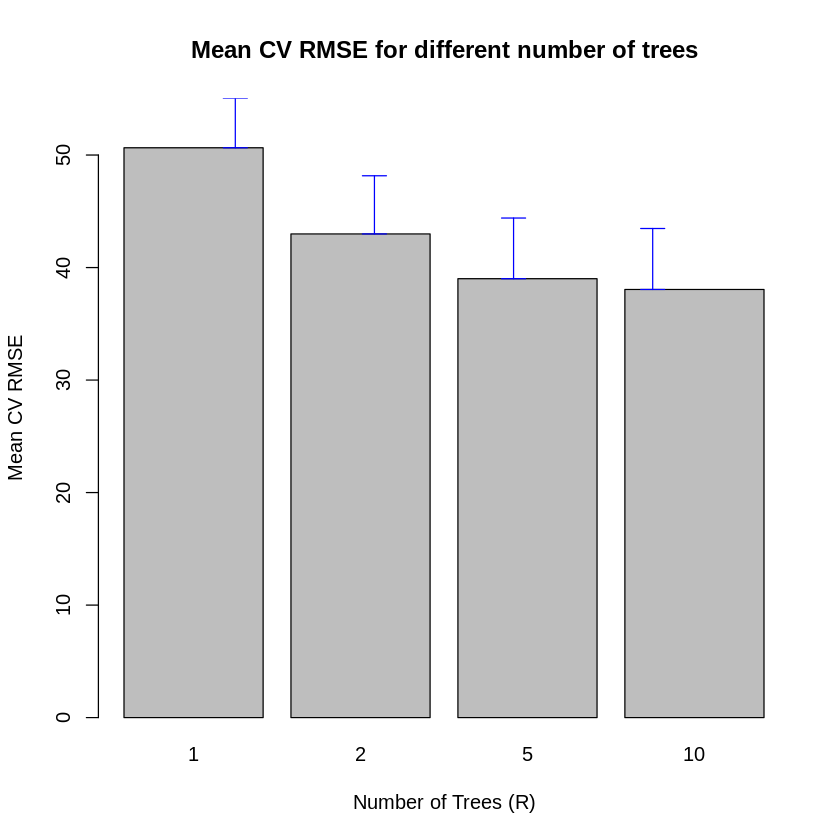

In [190]:
# Bar plot for RMSE
barplot(CV_rmse_mean, names.arg = Rs, beside = TRUE, col = "grey", ylim = c(0, max(CV_rmse_mean + CV_rmse_sd)),
        main = "Mean CV RMSE for different number of trees", xlab = "Number of Trees (R)", ylab = "Mean CV RMSE")
arrows(1:length(Rs), CV_rmse_mean, 1:length(Rs), CV_rmse_mean + CV_rmse_sd, angle = 90, code = 3, length = 0.1, col = "blue")


As we can see, as the number of trees increases, the mean CV RMSE decreases. The best model is the random forest with $R$ = 10. We can therefore conclude that fore these values of $R$ : more trees generally lead to a more stable and accurate prediction as the ensemble of trees can generalize better to unseen data. Nevertheless, this comes at the cost of more computation time.

# 6. Gradient-boosted trees

Adaptive boosting is a ensemble learning algorithm used for both classification and regression tasks. It works by combining multiple weak learners (models that perform slightly better than random chance) to create a strong classifier or regressor. The idea of combining multiple learners is to reduce the variance of the model. It builds trees sequentially. Each tree tries to correct the errors made by the previous trees. To implement this learning algorithm, we used the package "xgboost" which is not listed in the section 5 of the project instructions. It is the learning procedure chosen for the point 3 of the tasks $cf$. project assignement.


The main equation of the gradient-boosted tree represents how predictions are made in a gradient-boosting model. It is described as follows.

\begin{align*}
\hat{y}_i^{(t)} &= \hat{y}_i^{(t-1)} + \gamma \cdot h(x_i; \theta_t) \\
\end{align*}
- $\hat{y}_i^{(t)}$ represents the predicted value for observation $i$ at iteration $t$.
- $\hat{y}_i^{(t-1)}$ represents the predicted value for observation $i$ at the previous iteration $t-1$
-$\gamma$ is the learning rate
-$h(x_i; \theta_t)$  represents the contribution of the $t$-th tree, parameterized by $\theta_{t}$ to the prediction for observation $i$.


The justification of the choice of this learning procedure is to compare it with the different ensemble of trees (Random forest and ensemble of decision trees) considered in this project. Unlike bagging methods like Random Forests where trees are built independently, boosting methods like GBT build trees sequentially with each tree focusing on the errors made by the previous ones. Therefore, we want to see if this procedure is more accurate than the others ensemble of trees procedure.

In [191]:
install.packages("xgboost")
library(xgboost)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



As for all the previous training done, we use 10-folds cross validation to validate the performance of the model. The training is done as follows. Note that the hyperparameter of thus model are the following :
- max_depth : this parameter controls the maximum depth of the individual trees in the model
- eta : this parameter represents the learning rate. It controls the step size at each iteration while moving towards a minimum of the loss function (in this case the squared error loss function)
- nround : this parameter specifies the number of boosting rounds, i.e. the number of trees to build sequentially. Each boosting round aims to correct the errors of the previous round.
- objective : this parameter defines the learning task and the corresponding objective function.

In [192]:
CV_folds <- 10
size_CV <-floor(N/CV_folds)
CV_rmse_xgboost<-numeric(CV_folds)
CV_nmse_xgboost<-numeric(CV_folds)
average_residuals_xgboost<-numeric(CV_folds)
for (i in 1:CV_folds) {

     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

     DS<-cbind(X_tr,target=Y_tr)
     # Initialize the XGBoost regressor
     xgb <- xgboost(data = as.matrix(X_tr),
               label = Y_tr,
               max_depth = 3, #  controls the maximum depth of the individual trees in the model.
               eta = 0.1, # learning rate
               nrounds = 100, # number of boosting rounds (number of trees to build sequentially).
               objective = "reg:squarederror")

     # Model prediction
     Y_hat_ts<- predict(xgb, as.matrix(X_ts))
     Y_hat_ts<-exp(Y_hat_ts)

     # Residual calculation
     residuals <- exp(Y_ts) - Y_hat_ts
     average_residuals_xgboost <- average_residuals_xgboost + residuals

     # Cross validation error = RMSE
     CV_rmse_xgboost[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     CV_nmse_xgboost[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
}
average_residuals_xgboost <- average_residuals_xgboost / CV_folds

print(paste("CV RMSE=",round(mean(CV_rmse_xgboost),digits=4), " ; std dev=",round(sd(CV_rmse_xgboost),digits=4)))
print(paste("CV NMSE=",round(mean(CV_nmse_xgboost),digits=4), " ; std dev=",round(sd(CV_nmse_xgboost),digits=4)))

[1]	train-rmse:3.097720 
[2]	train-rmse:2.803876 
[3]	train-rmse:2.540918 
[4]	train-rmse:2.305471 
[5]	train-rmse:2.095402 
[6]	train-rmse:1.907933 
[7]	train-rmse:1.741367 
[8]	train-rmse:1.593111 
[9]	train-rmse:1.461976 
[10]	train-rmse:1.346264 
[11]	train-rmse:1.244664 
[12]	train-rmse:1.155335 
[13]	train-rmse:1.076989 
[14]	train-rmse:1.009310 
[15]	train-rmse:0.950433 
[16]	train-rmse:0.899856 
[17]	train-rmse:0.856635 
[18]	train-rmse:0.819372 
[19]	train-rmse:0.787549 
[20]	train-rmse:0.760979 
[21]	train-rmse:0.738231 
[22]	train-rmse:0.719156 
[23]	train-rmse:0.703046 
[24]	train-rmse:0.689547 
[25]	train-rmse:0.678505 
[26]	train-rmse:0.668935 
[27]	train-rmse:0.661170 
[28]	train-rmse:0.654447 
[29]	train-rmse:0.648889 
[30]	train-rmse:0.644078 
[31]	train-rmse:0.639700 
[32]	train-rmse:0.636427 
[33]	train-rmse:0.633547 
[34]	train-rmse:0.630839 
[35]	train-rmse:0.628869 
[36]	train-rmse:0.627062 
[37]	train-rmse:0.625556 
[38]	train-rmse:0.623937 
[39]	train-rmse:0.622

Warning message in average_residuals_xgboost + residuals:
“longer object length is not a multiple of shorter object length”


[1]	train-rmse:3.094197 
[2]	train-rmse:2.800666 
[3]	train-rmse:2.537665 
[4]	train-rmse:2.302415 
[5]	train-rmse:2.092743 
[6]	train-rmse:1.904929 
[7]	train-rmse:1.738369 
[8]	train-rmse:1.590311 
[9]	train-rmse:1.459442 
[10]	train-rmse:1.343747 
[11]	train-rmse:1.242106 
[12]	train-rmse:1.152411 
[13]	train-rmse:1.074227 
[14]	train-rmse:1.006429 
[15]	train-rmse:0.947649 
[16]	train-rmse:0.896779 
[17]	train-rmse:0.853244 
[18]	train-rmse:0.816315 
[19]	train-rmse:0.784742 
[20]	train-rmse:0.757695 
[21]	train-rmse:0.735025 
[22]	train-rmse:0.716157 
[23]	train-rmse:0.699941 
[24]	train-rmse:0.686349 
[25]	train-rmse:0.674940 
[26]	train-rmse:0.665542 
[27]	train-rmse:0.657565 
[28]	train-rmse:0.650851 
[29]	train-rmse:0.645448 
[30]	train-rmse:0.640737 
[31]	train-rmse:0.636387 
[32]	train-rmse:0.633023 
[33]	train-rmse:0.629967 
[34]	train-rmse:0.627513 
[35]	train-rmse:0.625264 
[36]	train-rmse:0.623424 
[37]	train-rmse:0.621734 
[38]	train-rmse:0.620285 
[39]	train-rmse:0.619

We can see that this model performed slighlty worser than the RF (38 against 37). It was the model having the overall lowest CV RMSE and NMSE. Therefore, this procedure gives the second lowest CV RMSE among all the learning procedures considered.

# Comparison of the models performance and selection of the final model

In this section we aim to compare the performance of the models. It aims to select the final model that we will use to do the final prediction on the test set. The selected model must be accurate and must generalize well to unseen data. To do that, we compare the 10-fold cross validation RMSE and NMSE to assess the model's performance on different subsets of the data. We will base our selection on these two performance metrics.

We first compare the performance of the models in terms of root mean squared error (RMSE).

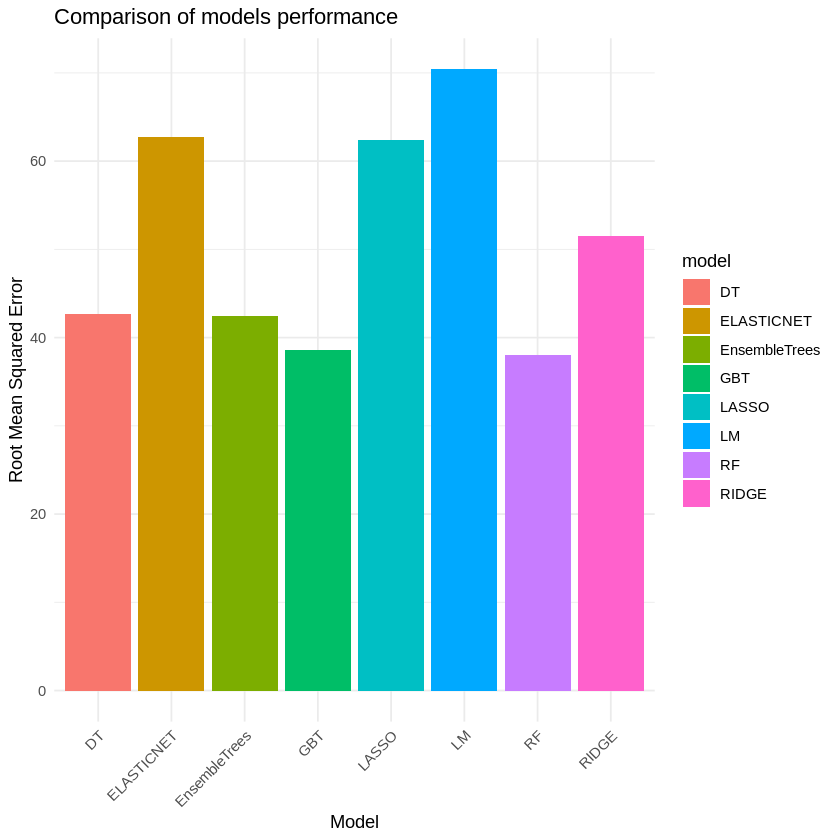

In [193]:
# List of vectors containing root mean squared errors for different models
mse_list <- list(LM = mean(CV_rmse_lm) ,
                 LASSO = mean(CV_rmse_lasso),
                 RIDGE = mean(CV_rmse_ridge),
                 ELASTICNET = mean(CV_rmse_elastic),
                 DT = mean(CV_rmse_single),
                 EnsembleTrees = mean(CV_rmse_ensemble),
                 RF = mean(CV_rmse_rf),
                 GBT = mean(CV_rmse_xgboost)
                 )

# Create a data frame from the MSE list
mse_df <- data.frame(model = rep(names(mse_list), sapply(mse_list, length)),
                     mse = unlist(mse_list))

# Plotting
library(ggplot2)

# Plot mean squared errors
ggplot(mse_df, aes(x = model, y = mse, fill = model)) +
  geom_bar(stat = "identity") +
  labs(title = "Comparison of models performance",
       x = "Model",
       y = "Root Mean Squared Error") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


More precisely, the mean CV RMSE of each model is the following.

In [194]:
mean(CV_rmse_lm)
mean(CV_rmse_lasso)
mean(CV_rmse_ridge)
mean(CV_rmse_elastic)
mean(CV_rmse_single)
mean(CV_rmse_ensemble)
mean(CV_rmse_rf)
mean(CV_rmse_xgboost)


[1] 70.40335

[1] 62.34157

[1] 51.48477

[1] 62.7395

[1] 42.67135

[1] 42.42138

[1] 38.05204

[1] 38.63979

As we said before, the random forest is the one having the lowest root mean squared error (averaged across the ten folds) following by the gradient-boosted trees model, the ensemble of trees, the single decision tree, the ridge regularisation and lasso regularisation, the elastic net and the multiple linear regression.

We also compare the performance of the models in term of normalised mean squared error (NMSE).

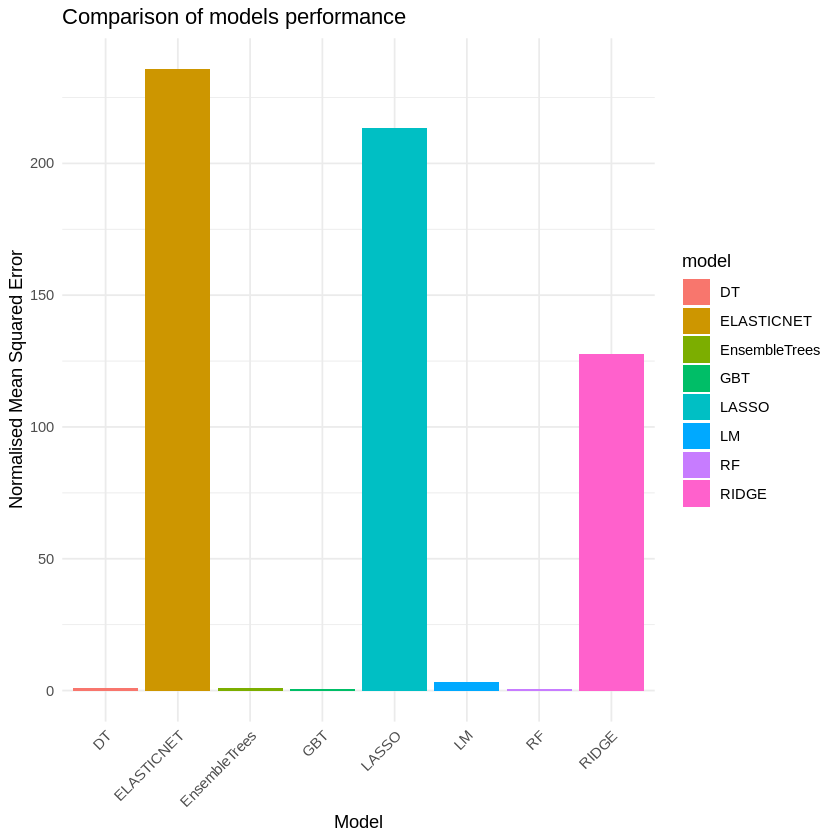

In [195]:
# List of vectors containing normalized mean squared errors for different models
mse_list <- list(LM = mean(CV_nmse_lm) ,
                 LASSO = mean(CV_nmse_lasso),
                 RIDGE = mean(CV_nmse_ridge),
                 ELASTICNET = mean(CV_nmse_elastic),
                 DT = mean(CV_nmse_single),
                 EnsembleTrees = mean(CV_nmse_ensemble),
                 RF = mean(CV_nmse_rf),
                 GBT = mean(CV_nmse_xgboost)
                 )

# Create a data frame from the MSE list
mse_df <- data.frame(model = rep(names(mse_list), sapply(mse_list, length)),
                     mse = unlist(mse_list))

# Plotting
library(ggplot2)

# Plot mean squared errors
ggplot(mse_df, aes(x = model, y = mse, fill = model)) +
  geom_bar(stat = "identity") +
  labs(title = "Comparison of models performance",
       x = "Model",
       y = "Normalised Mean Squared Error") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


More precisely, the mean CV NMSE for each model is the following.

In [196]:
mean(CV_nmse_lm)
mean(CV_nmse_lasso)
mean(CV_nmse_ridge)
mean(CV_nmse_elastic)
mean(CV_nmse_single)
mean(CV_nmse_ensemble)
mean(CV_nmse_rf)
mean(CV_nmse_xgboost)


[1] 3.365101

[1] 213.6151

[1] 127.765

[1] 235.6867

[1] 0.8627017

[1] 0.8518592

[1] 0.6855993

[1] 0.7067398

We can draw the same conclusion as for the RMSE.

We plot also the residuals for the differents models. The rationale behind this choice is because residual plots can  be useful for comparing different models. By plotting residuals from different models on the same graph, we can visually compare their performance and choose the model that provides the best fit to the data.

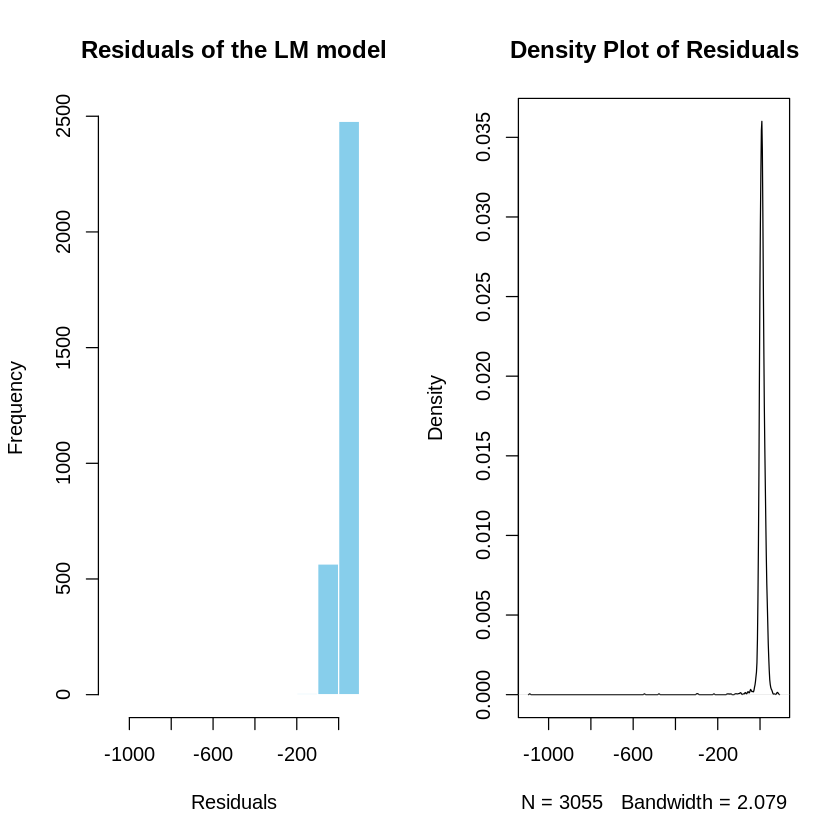

In [197]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_lm,
     main = "Residuals of the LM model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_lm), main = "Density Plot of Residuals")


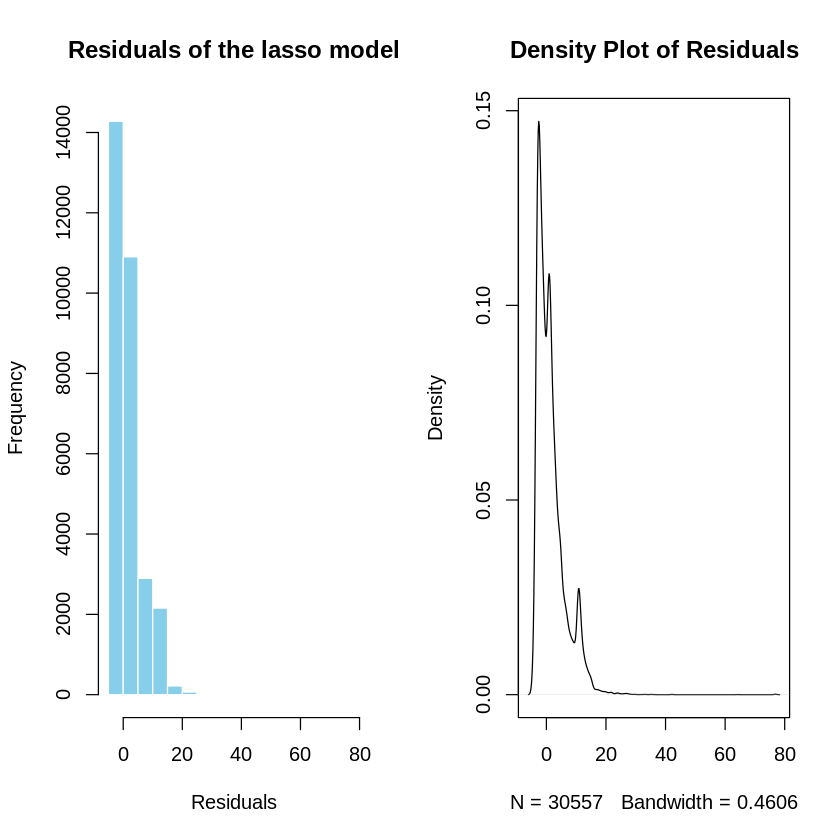

In [198]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_lasso,
     main = "Residuals of the lasso model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_lasso), main = "Density Plot of Residuals")


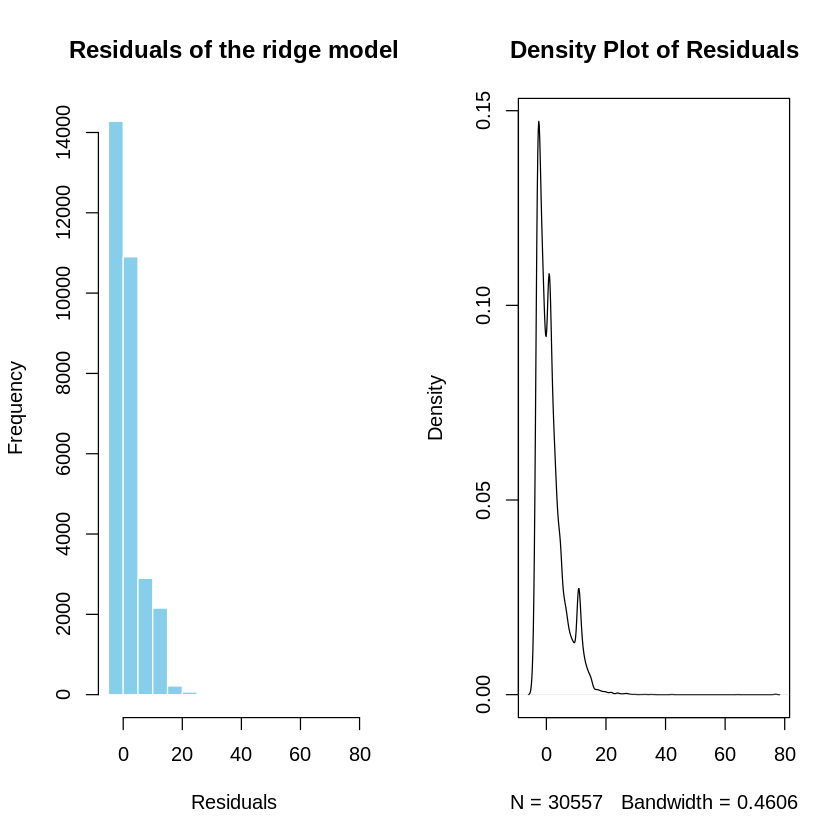

In [199]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_ridge,
     main = "Residuals of the ridge model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_ridge), main = "Density Plot of Residuals")



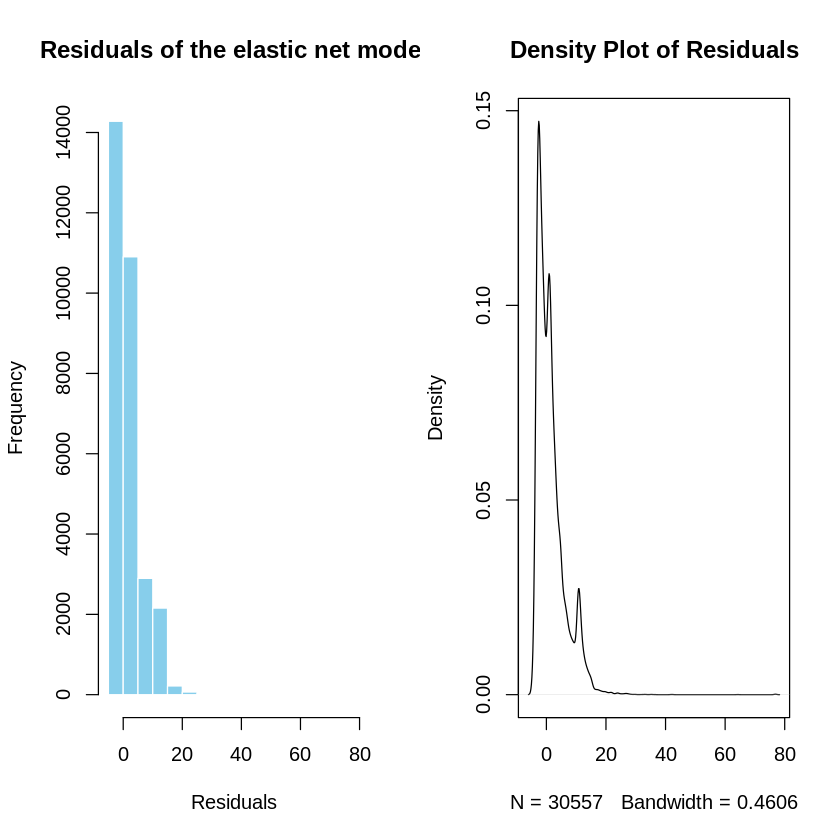

In [200]:
layout(matrix(c(1, 2), nrow = 1))
# Plot histogram of residuals
hist(average_residuals_elastic,
     main = "Residuals of the elastic net model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_elastic), main = "Density Plot of Residuals")


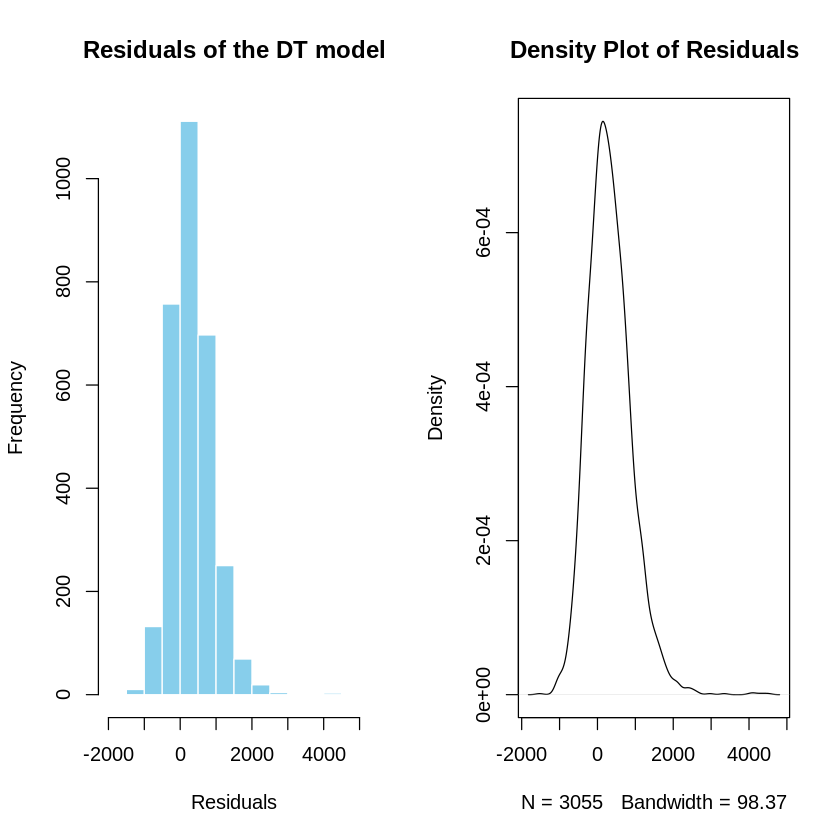

In [201]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_single,
     main = "Residuals of the DT model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_single), main = "Density Plot of Residuals")

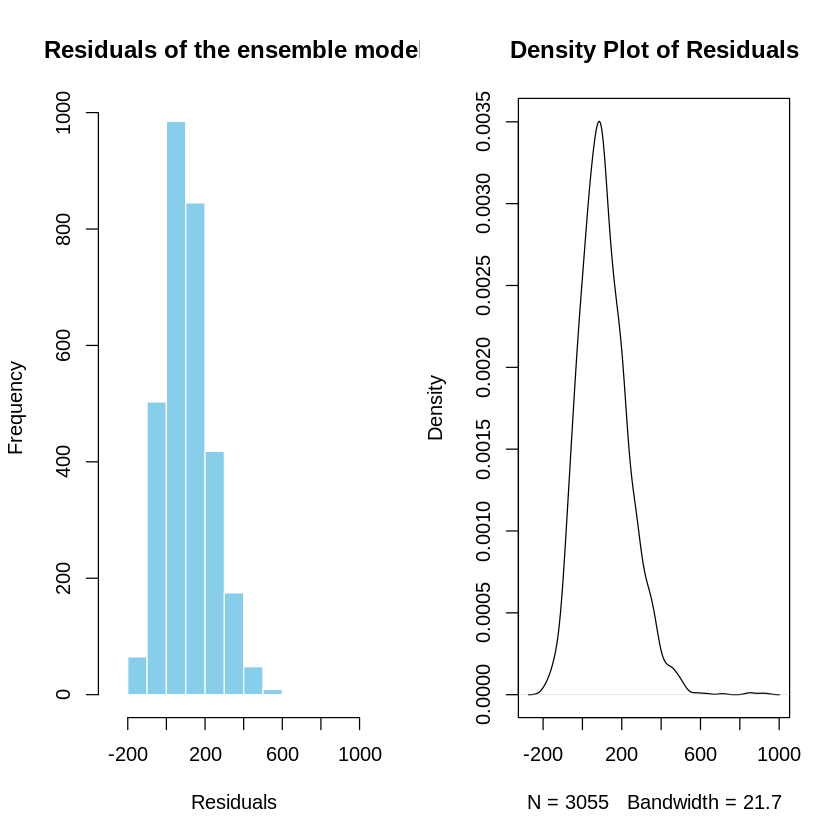

In [202]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_ensemble,
     main = "Residuals of the ensemble model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_ensemble), main = "Density Plot of Residuals")


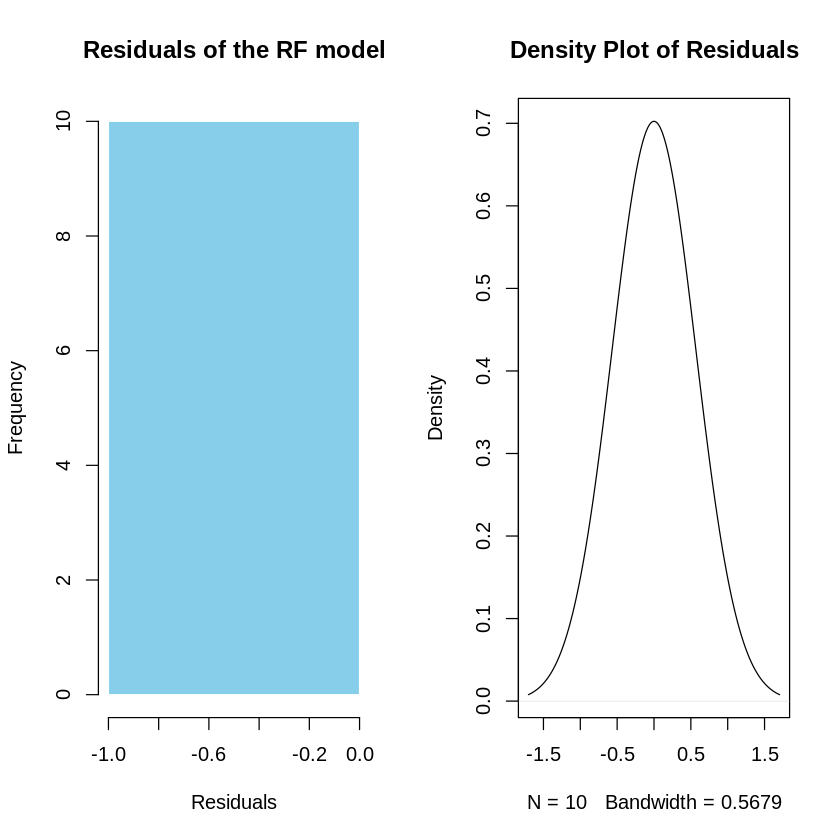

In [203]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_rf,
     main = "Residuals of the RF model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_rf), main = "Density Plot of Residuals")


Note that the residuals of the RF model are normally distributed.

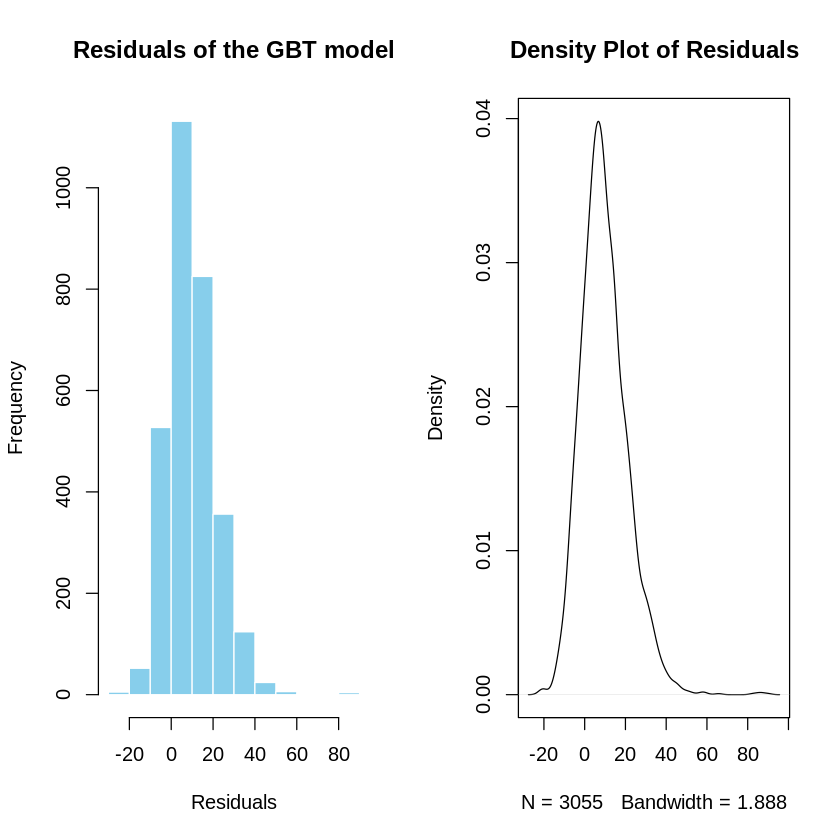

In [204]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_xgboost,
     main = "Residuals of the GBT model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_xgboost), main = "Density Plot of Residuals")


The plot confirm that the gradient-boosted tree has the best overall performance. Therefore, we select it to do the final prediction for the Zindi Competition

# Prediction for the Zindi Competition

This section aims to compute the compute the predictions for the competition using the test set. As 4 models were asked to implement, we decided to submit the predictions of only 4 models. We have chosen the linear model, the random forest, the gradient-boosted trees and decision tree.

In [205]:
# Assuming train_data and test_data are your training and testing datasets, respectively

predictions_lm <- exp(predict(model_lm,X_test))
predictions_dt <- exp(predict(model_tree,X_test))
predictions_rf <- exp(predict(model_rf,X_test))
predictions_xgb <- exp(predict(xgb,as.matrix(X_test)))

In [206]:
submission$target <- predictions_lm
write_csv(submission, 'submission_lm.csv')



In [207]:
submission$target <- predictions_dt
write_csv(submission, 'submission_dt.csv')

In [208]:
submission$target <- predictions_rf
write_csv(submission, 'submission_rf.csv')


In [209]:
submission$target <- predictions_xgb
write_csv(submission, 'submission_xgb.csv')

# Feature selection based on conditional entropy

Ranking the predictive power of each features will be done by estimating the conditional information of each feature about the target variable given all other features. The problem of minimizing mutual information is equivalent to maximizing the conditional entropy. As such, we can rank the predictive power of each feature by either base it on its mutual information of the target variable in descending order or by basing it on the conditional entropy in regards to all other variables in ascending order.

In [210]:
# Function to calculate entropy
entropy <- function(y, y_hat) {
  probs <- table(y, y_hat) / length(y)
  entr = -sum(probs * log2(probs))
  return (entr)
}

Here is the code that calculates and ranks predictive power  of features based on their conditional entropy.

We restrict the set $X$ to the 10 most relevant features selected in the previous steps.  

In [211]:
ten_most_correlated_features <- correlation_ranking_idx[1:10]
X_ten_features_selected <- X[,ten_most_correlated_features]

In [219]:
# Vector containing conditional information
cond_information <- numeric(ncol(X_ten_features_selected))


# Calculate the conditional information for each feature
for (i in 1:ncol(X_ten_features_selected)) {
  # Remove the ith feature from the set of features
  X_minus_i <- X_ten_features_selected[, -i]

  # Train the model
  model <- lm(Y~., data = X_minus_i)

  # Prediction using the X-i set of features
  y_hat_minus_i <- predict(model, newdata = X_minus_i)

  # Calculate the entropy of y given the X-i set of feature
  H_y_X_minus_i <- entropy(Y, y_hat_minus_i)

  # Calculate the entropy of y given X
  H_y_X <- entropy(Y, predict(model))

  # Compute the conditional information of the ith feature
  cond_information[i] <- H_y_X_minus_i - H_y_X
}

# Sort the features based on conditional information in descending order
sorted_features <- names(X_ten_features_selected)[order(cond_information, decreasing = TRUE)]

cat("Feature conditional information rankings:\n")
for (i in 1:length(sorted_features)) {
  cat(i, ": ", sorted_features[i], "\n")
}

Feature conditional information rankings:
1 :  L3_AER_AI_sensor_altitude 
2 :  L3_CO_CO_column_number_density 
3 :  L3_NO2_NO2_slant_column_number_density 
4 :  L3_NO2_NO2_column_number_density 
5 :  L3_AER_AI_solar_azimuth_angle 
6 :  L3_CLOUD_solar_azimuth_angle 
7 :  L3_O3_solar_azimuth_angle 
8 :  L3_SO2_solar_azimuth_angle 
9 :  u_component_of_wind_10m_above_ground 
10 :  L3_HCHO_solar_azimuth_angle 


This ranking seems to be consistent as these features are ranked from the most correlated to the less correlated (with respect to the target variable). Indeed, the two most correlated features with the target variable (and important features used in RF for example) are L3_AER_AI_sensor_altitude and L3_CO_CO_column_number_density. These two features seem to have the most predictive power in this classement which is therefore consistent with the work done before.